_4th March 2018_  
_Author: Varun Sundar_     
_Course: EE2703_ 

# Abstract

This week's assignment covers the topic of Discrete Fourier Transform (DFT) using python's fft library. The introduction serves as a write-up on the various discrete transforms and implementation utility. We further examine the DFT of various numeric arrays, while drawing inferences from their analog counterparts.


# Introduction

The Discrete Fourier transform (DFT) is the digitsed analogue of the analog Fourier Series.

A standard interpretation is to view it as the Discrete Time Fourier Transform (DTFT), for periodic discrete signals.

Consider (DTFT),

$$ \begin{aligned} F(e^{j\theta})= \sum_{n=-\infty}^{\infty} f[n]e^{−jn\theta} \hfill \hfill \end{aligned} $$

now if, 

$$ f[n+N] = f[n] \forall n $$


We notice that, this will converge to the Discrete Fourier Transform, since:

* All the available information is contained within N samples.

* $X_{1/T}(f)$  converges to zero everywhere except integer multiples of $\frac {1}{NT}$ and $\frac {1}{NT}$  also called harmonic frequencies.

* The DTFT is periodic, so the maximum number of unique harmonic amplitudes is N. 


Introducing the notation $\sum _{N}$  to represent a sum over any n-sequence of length N, we can write:

$$ \begin{aligned}X_{1/T}\left({\frac {k}{NT}}\right)&=\sum _{m=-\infty }^{\infty }\left(\sum _{N}x[n-mN]\cdot e^{-i2\pi {\frac {k}{N}}(n-mN)}\right)\\&=\sum _{m=-\infty }^{\infty }\left(\sum _{N}x[n]\cdot e^{-i2\pi {\frac {k}{N}}n}\right)=T\underbrace {\left(\sum _{N}x(nT)\cdot e^{-i2\pi {\frac {k}{N}}n}\right)} _{X[k]\quad {\text{(DFT)}}}\cdot \left(\sum _{m=-\infty }^{\infty }1\right).\end{aligned} $$

$$ \begin{aligned}X_{1/T}\left({\frac {k}{NT}}\right)&=\sum _{m=-\infty }^{\infty }\left(\sum _{N}x[n-mN]\cdot e^{-i2\pi {\frac {k}{N}}(n-mN)}\right)\\&=\sum _{m=-\infty }^{\infty }\left(\sum _{N}x[n]\cdot e^{-i2\pi {\frac {k}{N}}n}\right)=T\underbrace {\left(\sum _{N}x(nT)\cdot e^{-i2\pi {\frac {k}{N}}n}\right)} _{X[k]\quad {\text{(DFT)}}}\cdot \left(\sum _{m=-\infty }^{\infty }1\right).\end{aligned} $$

Where, we have :


Discrete Fourier Transform:

$$ a_k = \frac{1}{N} \sum_{n=0}^{N-1} \tilde{x}[n]\exp(−i \frac{2\pi kn}{N}) $$

or 

$$ \tilde{x}[n] = \frac{1}{N} \sum_{n=0}^{N-1} a_k \exp(−i \frac{2\pi kn}{N}) $$


Discrete Fourier Series: (of length $N$)

$$ X_d (k) = \sum_{n=0}^{N-1} {x}[n]\exp(−i \frac{2\pi kn}{N})$$ where k goes from $[0...N-1]$

or

$$ {x}[n] = \frac{1}{N} \sum_{n=0}^{N-1}X_d(k)\exp(−i \frac{2\pi kn}{N}) $$

where n goes from $[0...N-1]$

Both the DFT and DFS may be seen as a sampled version of $X(e^{j\theta})$, albeit with different validity (DFS is valid only for periodic $x[n]$, but DFT holds for any finite $x[n]$).

### Using IFFT Shift, FFT Shift

These function can be used to change the domain of n and k to correct the DFT of a numeric array. Given the options:

Following a MATLAB style convention,

* `fft(ifftshift(x))` is defined for $n$ in $[-N/2...N/2-1$], $k$ in $[0...N-1]$. 

* `fftshift(fft(x))` is defined for $n$ in $[0...N-1]$, $k$ in $[-N/2...N/2-1]$ .

* `fftshift(fft(fftshift(x)))` is defined for $n$ in $[-N/2...N/2-1]$, $k$ in $[-N/2...N/2-1]$. 

* `ifft(ifftshift(X))` is defined for $n$ in $[0...N-1]$, $k$ in $[-N/2...N/2-1]$.

Here, all functions are appropriately scoped from _numpy's_ _fft_ module.

In [66]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [81]:
def initialise_notebook():
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 10
    plt.rcParams['xtick.labelsize'] = 8
    plt.rcParams['ytick.labelsize'] = 8
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['figure.titlesize'] = 12
    plt.rcParams['figure.figsize'] = 15, 10
    plt.rcParams['figure.dpi'] = 150

## Numpy's FFT Module

We use a series of examples to go over numpy's fft module.

### Random noise case

In [82]:
x=np.random.rand(100)
X=np.fft.fft(x)
y=np.fft.ifft(X)

# Numpy's Stack trick
display(np.c_[x,y][:20])
print( abs(x-y).max())

array([[0.57871802+0.00000000e+00j, 0.57871802-1.77635684e-17j],
       [0.91704189+0.00000000e+00j, 0.91704189+2.30926389e-16j],
       [0.05653519+0.00000000e+00j, 0.05653519-6.21724894e-17j],
       [0.26021534+0.00000000e+00j, 0.26021534+9.43689571e-17j],
       [0.4192927 +0.00000000e+00j, 0.4192927 -2.10571049e-16j],
       [0.94975448+0.00000000e+00j, 0.94975448+1.19786036e-17j],
       [0.97058718+0.00000000e+00j, 0.97058718+3.00015713e-16j],
       [0.60941686+0.00000000e+00j, 0.60941686+1.30107686e-16j],
       [0.74138505+0.00000000e+00j, 0.74138505-1.16937934e-16j],
       [0.72813022+0.00000000e+00j, 0.72813022-1.94080147e-16j],
       [0.77721196+0.00000000e+00j, 0.77721196+3.05226885e-16j],
       [0.94820634+0.00000000e+00j, 0.94820634+5.20018166e-16j],
       [0.30022433+0.00000000e+00j, 0.30022433+2.59181381e-16j],
       [0.01030994+0.00000000e+00j, 0.01030994+3.28195414e-16j],
       [0.52005983+0.00000000e+00j, 0.52005983-1.31001794e-16j],
       [0.70288824+0.0000

1.1934016867249468e-15


We notice a few inaccuracies- in particular the imaginary part is not always zero, due to the error in computing ifft().

### The Sinusoid Case

Here, we attempt the DFT of a sinusoidal discrete array. As mentioned in the assignment sheet, we examine the linear spacing to be followed, the size of impulses to be plotted - among other details.

Note that, 

$$ y = sin(x) = \frac{e^{jx} −e^{-jx}}{2j} $$

With the spectrum (continuous time),

$$ Y(\omega)= \frac{[\delta(\omega−1)−\delta(\omega+1)]}{2j} $$

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


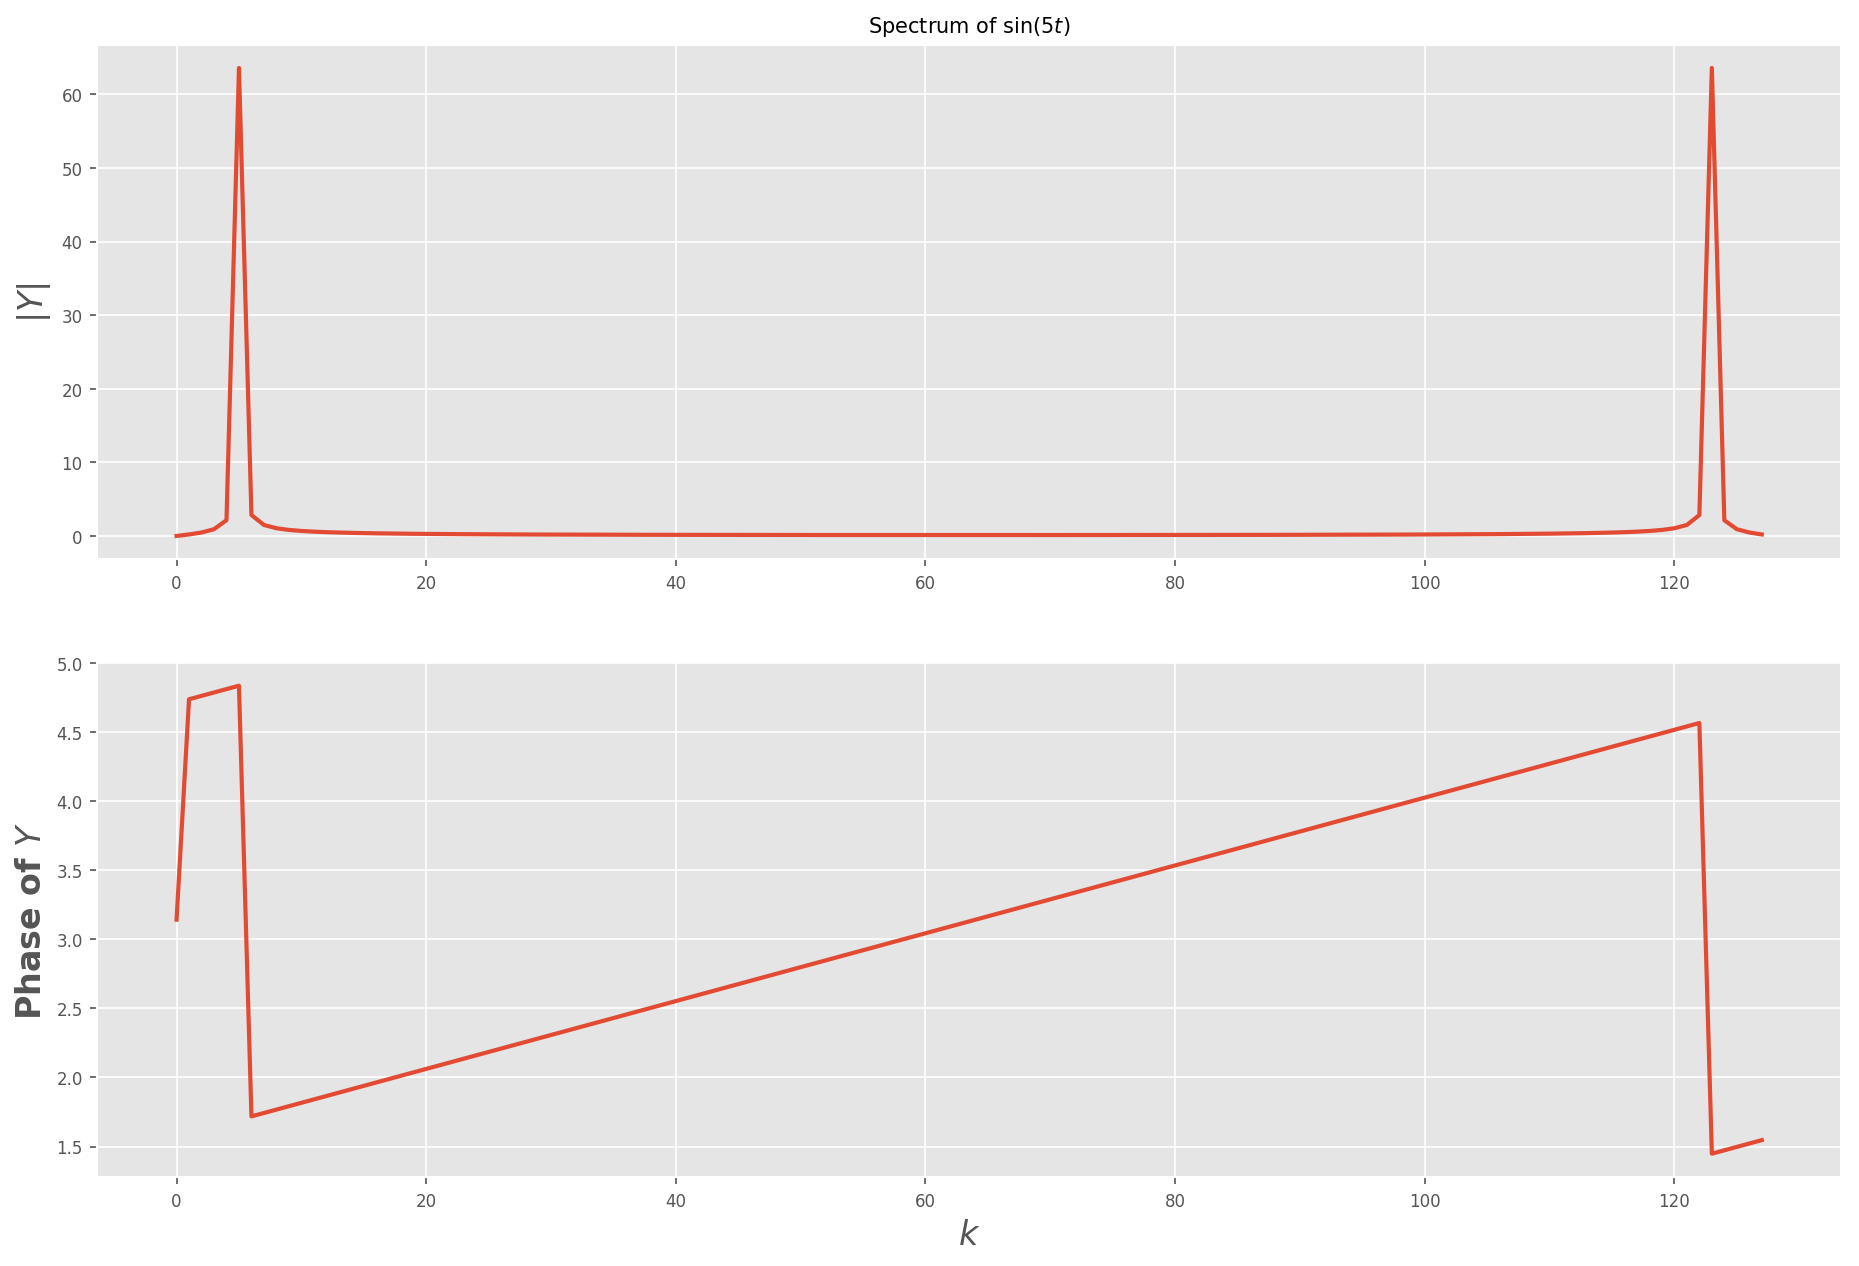

In [83]:
x=np.linspace(0,2*np.pi,128)
y=np.sin(5*x)
Y=np.fft.fft(y)

# Some plotting fixes
initialise_notebook()

# Matlab style subplotting
plt.figure()
plt.subplot(2,1,1)
plt.plot(abs(Y),lw=2)
plt.grid(True)
plt.ylabel(r"$|Y|$",size=16)
plt.title(r"Spectrum of $\sin(5t)$")

# Plot two
plt.subplot(2,1,2)
plt.plot(np.unwrap(np.angle(Y)),lw=2)
plt.ylabel(r"Phase of $Y$",size=16)
plt.xlabel(r"$k$",size=16)
plt.grid(True)
plt.show()

There are a couple of issues that need fixing here,

* Firstly, the position of the spikes needs to be corrected. This can be done by fft shift.
* The magnitude of the spikes also needs to be corrected (from 64 to 0.5). This may be done by dividing by the sample rate.
* The frequency axis needs to be in place. This is due to the duplicacy of $0$ and $2\pi$.

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


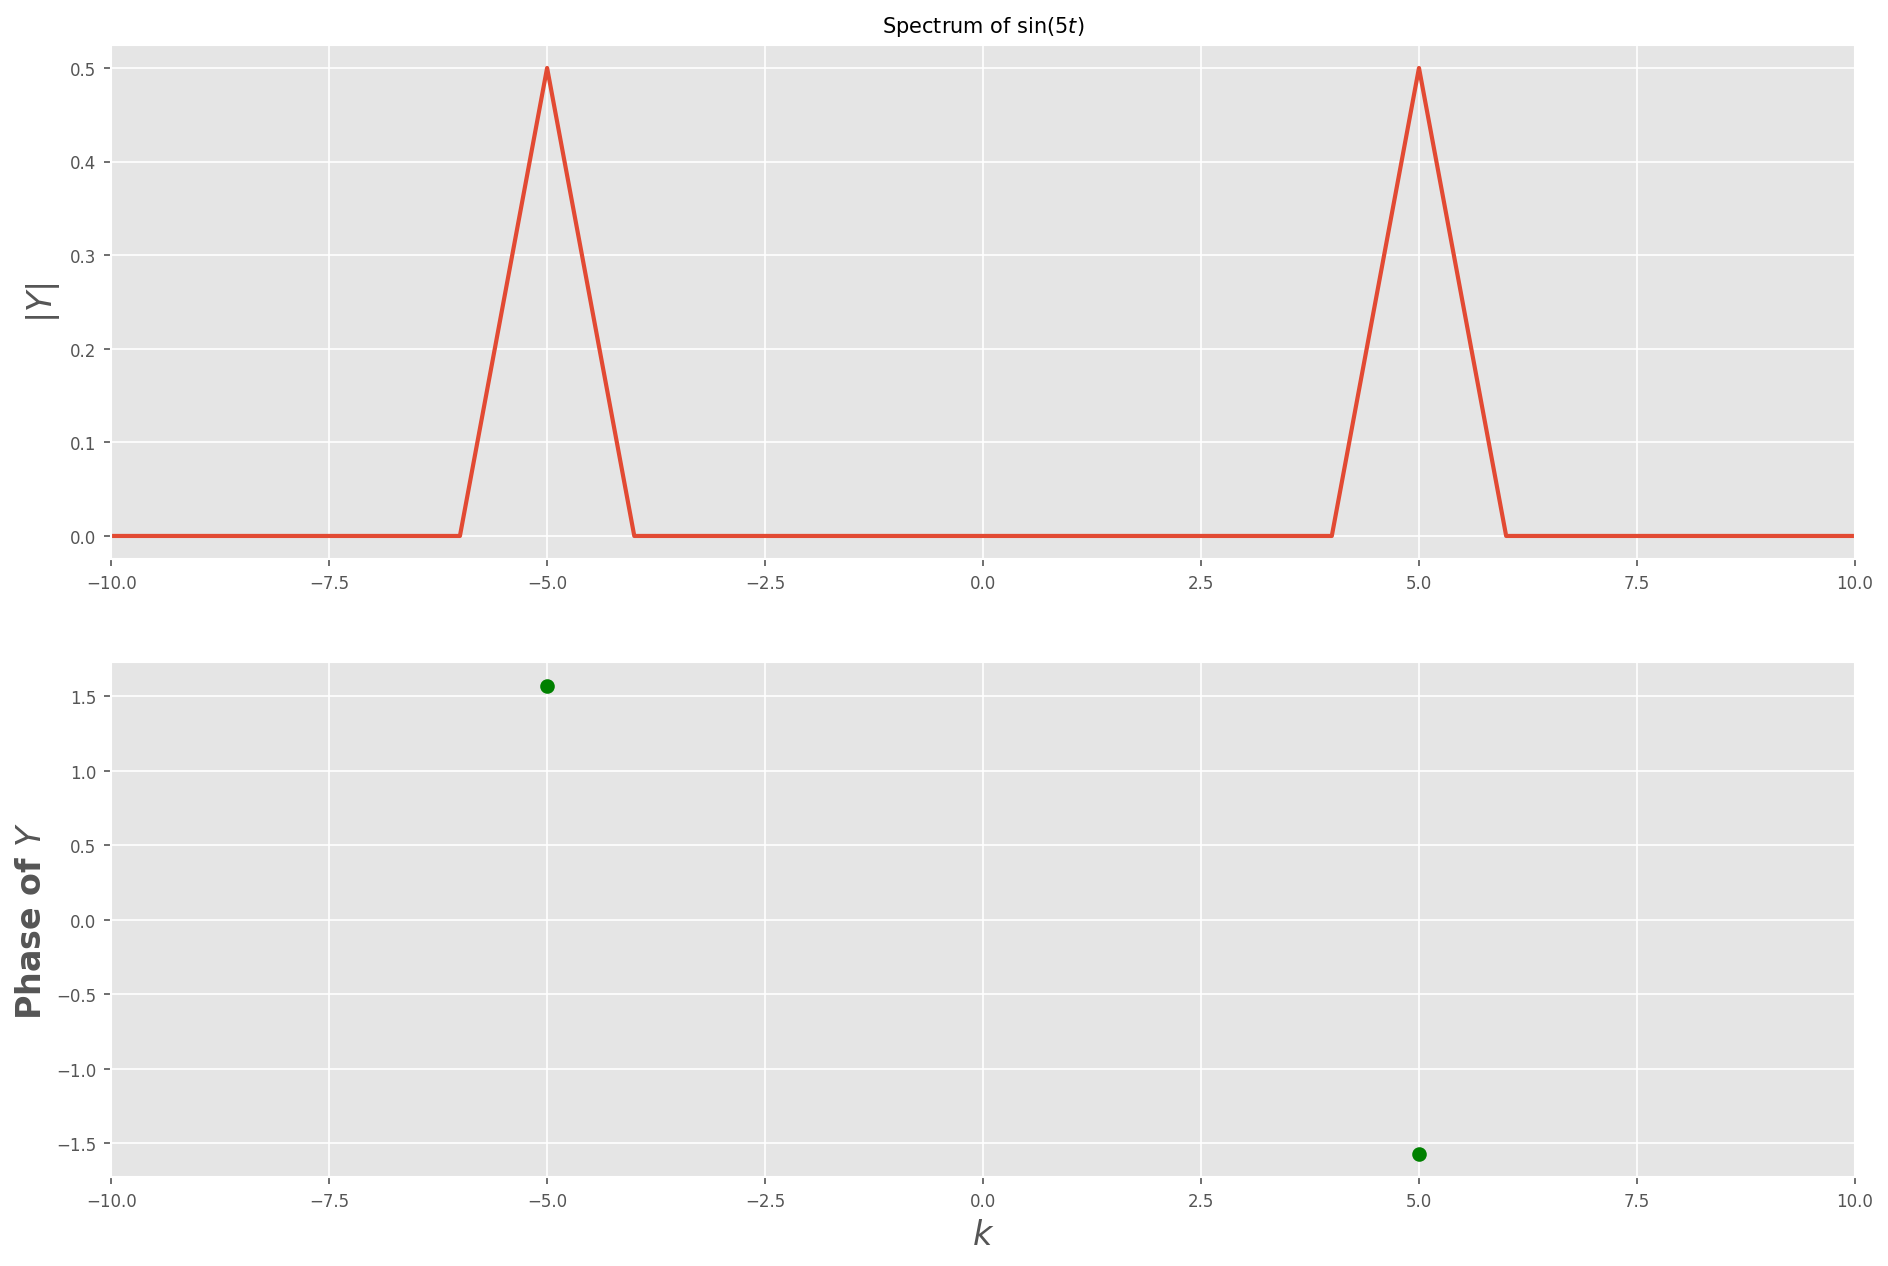

In [84]:
x=np.linspace(0,2*np.pi,129);x=x[:-1]
y=np.sin(5*x)
Y=np.fft.fftshift(np.fft.fft(y))/128.0
w=np.linspace(-64,63,128)

# Figure 1
plt.figure()
plt.subplot(2,1,1)
plt.plot(w,abs(Y),lw=2)
plt.xlim([-10,10])
plt.ylabel(r"$|Y|$",size=16)
plt.title(r"Spectrum of $\sin(5t)$")
plt.grid(True)

# Figure 2
plt.subplot(2,1,2)

# We choose to supress points with no amplitude (below a threshold)
#plt.plot(w,np.angle(Y),'ro',lw=2)
ii=np.where(np.abs(Y)>1e-3)
plt.plot(w[ii],np.angle(Y[ii]),'go',lw=2)
plt.xlim([-10,10])
plt.ylabel(r"Phase of $Y$",size=16)
plt.xlabel(r"$k$",size=16)
plt.grid(True)

# Display
plt.show()

### Amplitude Modulation Case

Here we examine an amplitude modulated signal,
$$ f(t) = (1+0.1cos(t))cos(10t) $$

We expect a shifted set of spikes, with a main impulse and two side impulses on each side. The main impulse would have an amplitude of 0.5, whereas the shifted ones would have an amplitude of 0.025, considering that,

$$ 0.1 cos(10t) cos(t) = 0.05 (cos 11t + cos 9t ) $$ $$
= 0.025 (e^{11tj} +e^{9tj} +e^{−11tj} +e^{−9tj})
$$

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


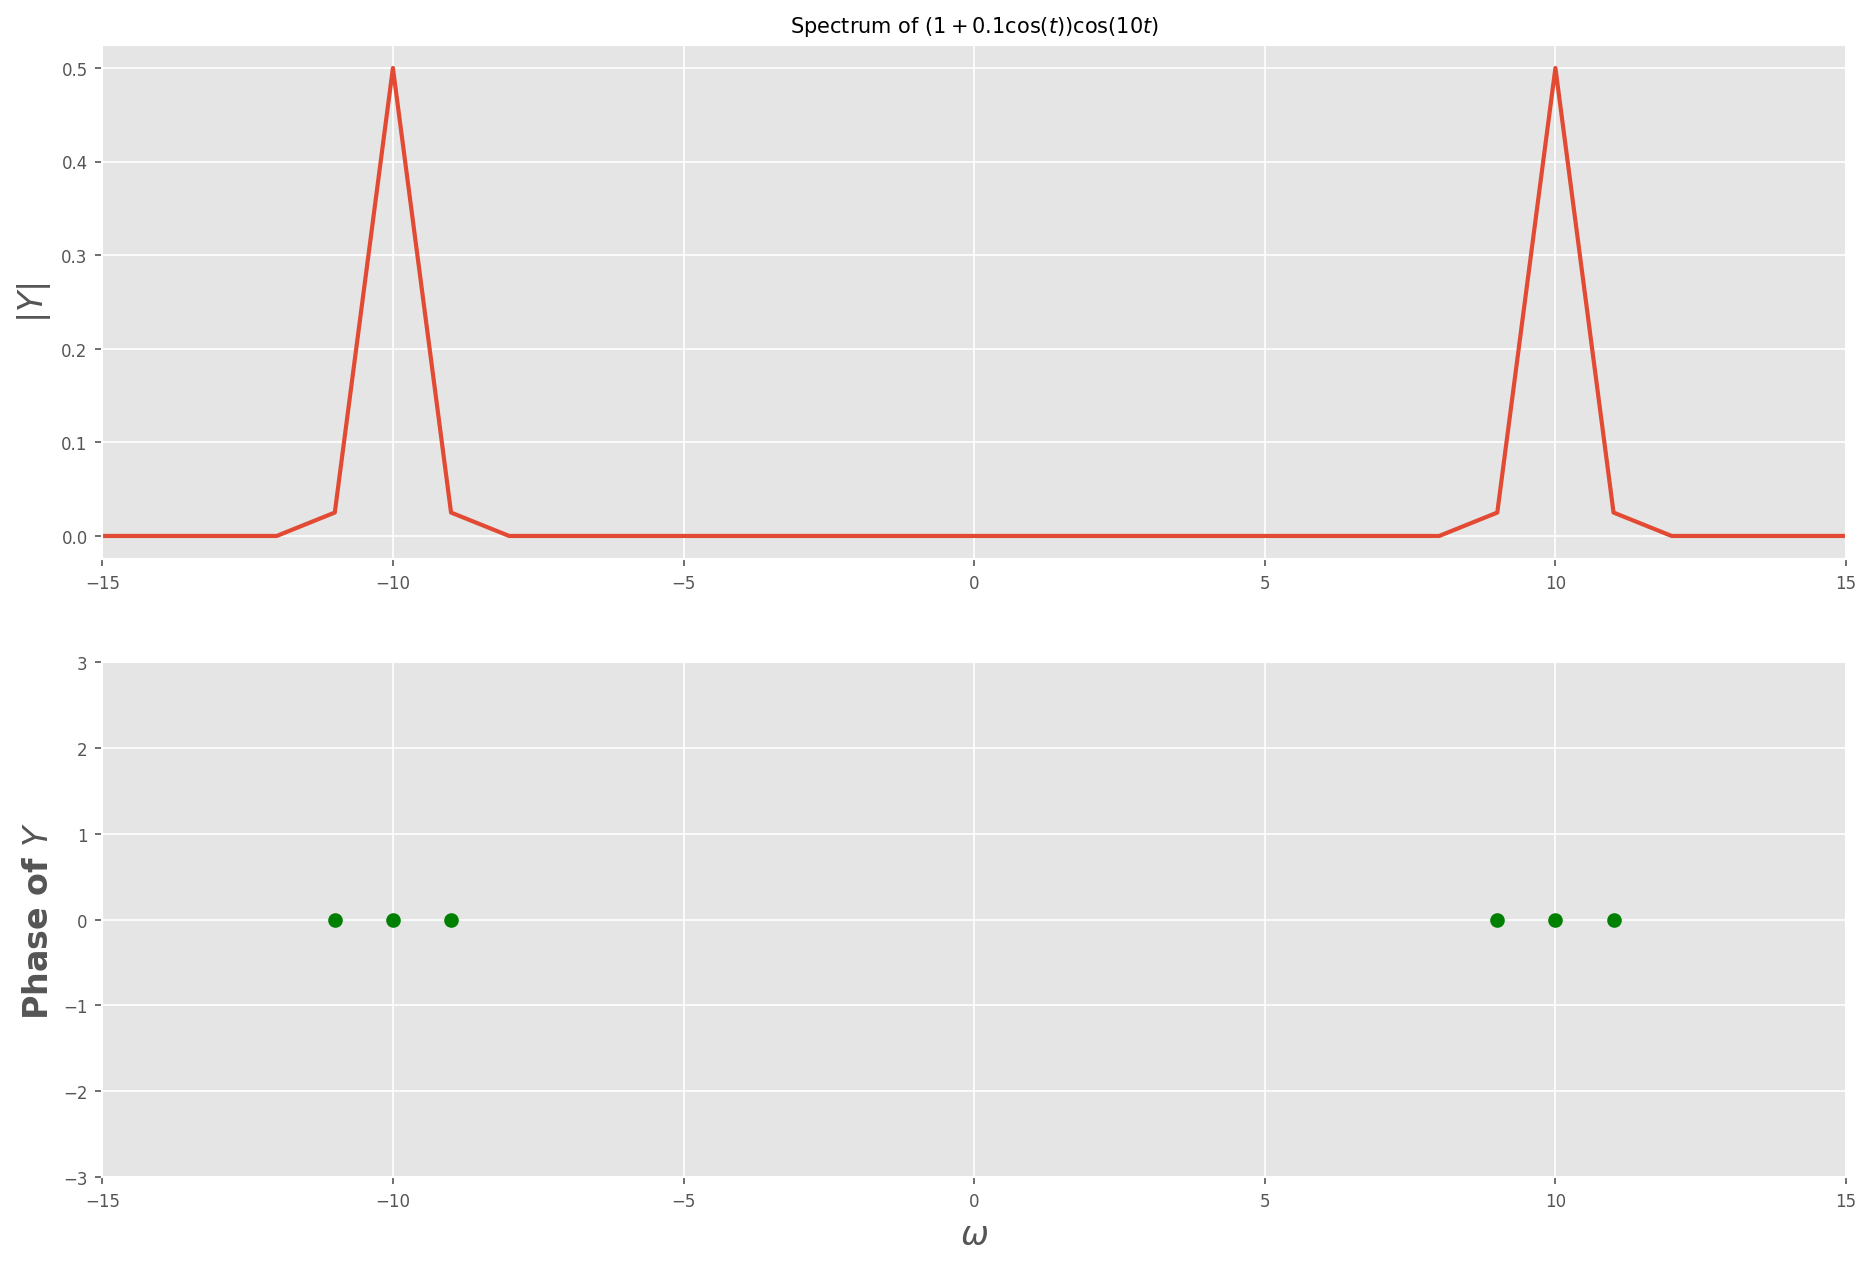

In [85]:
t=np.linspace(0,2*np.pi,129);t=t[:-1]
y=(1+0.1*np.cos(t))*np.cos(10*t)
Y=np.fft.fftshift(np.fft.fft(y))/128.0
w=np.linspace(-64,63,128)

# Figure 1
plt.figure()
plt.subplot(2,1,1)
plt.plot(w,abs(Y),lw=2)
plt.xlim([-15,15])
plt.ylabel(r"$|Y|$",size=16)
plt.title(r"Spectrum of $\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right)$")
plt.grid(True)
 
# Figure 2
plt.subplot(2,1,2)
#plt.plot(w,np.angle(Y),'ro',lw=2)
ii=np.where(np.abs(Y)>1e-3)
plt.plot(w[ii],np.angle(Y[ii]),'go',lw=2)
plt.xlim([-15,15])
plt.ylim([-3,3])
plt.ylabel(r"Phase of $Y$",size=16)
plt.xlabel(r"$\omega$",size=16)
plt.grid(True)
plt.show()

Notice that in order to see the two side bands, we will have to improve the frequency resolution. Note that this will involve reducing the time resolution, owing to their inverse dependence. 

Since we wish to keep the number of samples more or less consistent, we choose to broaden the time space instead.

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


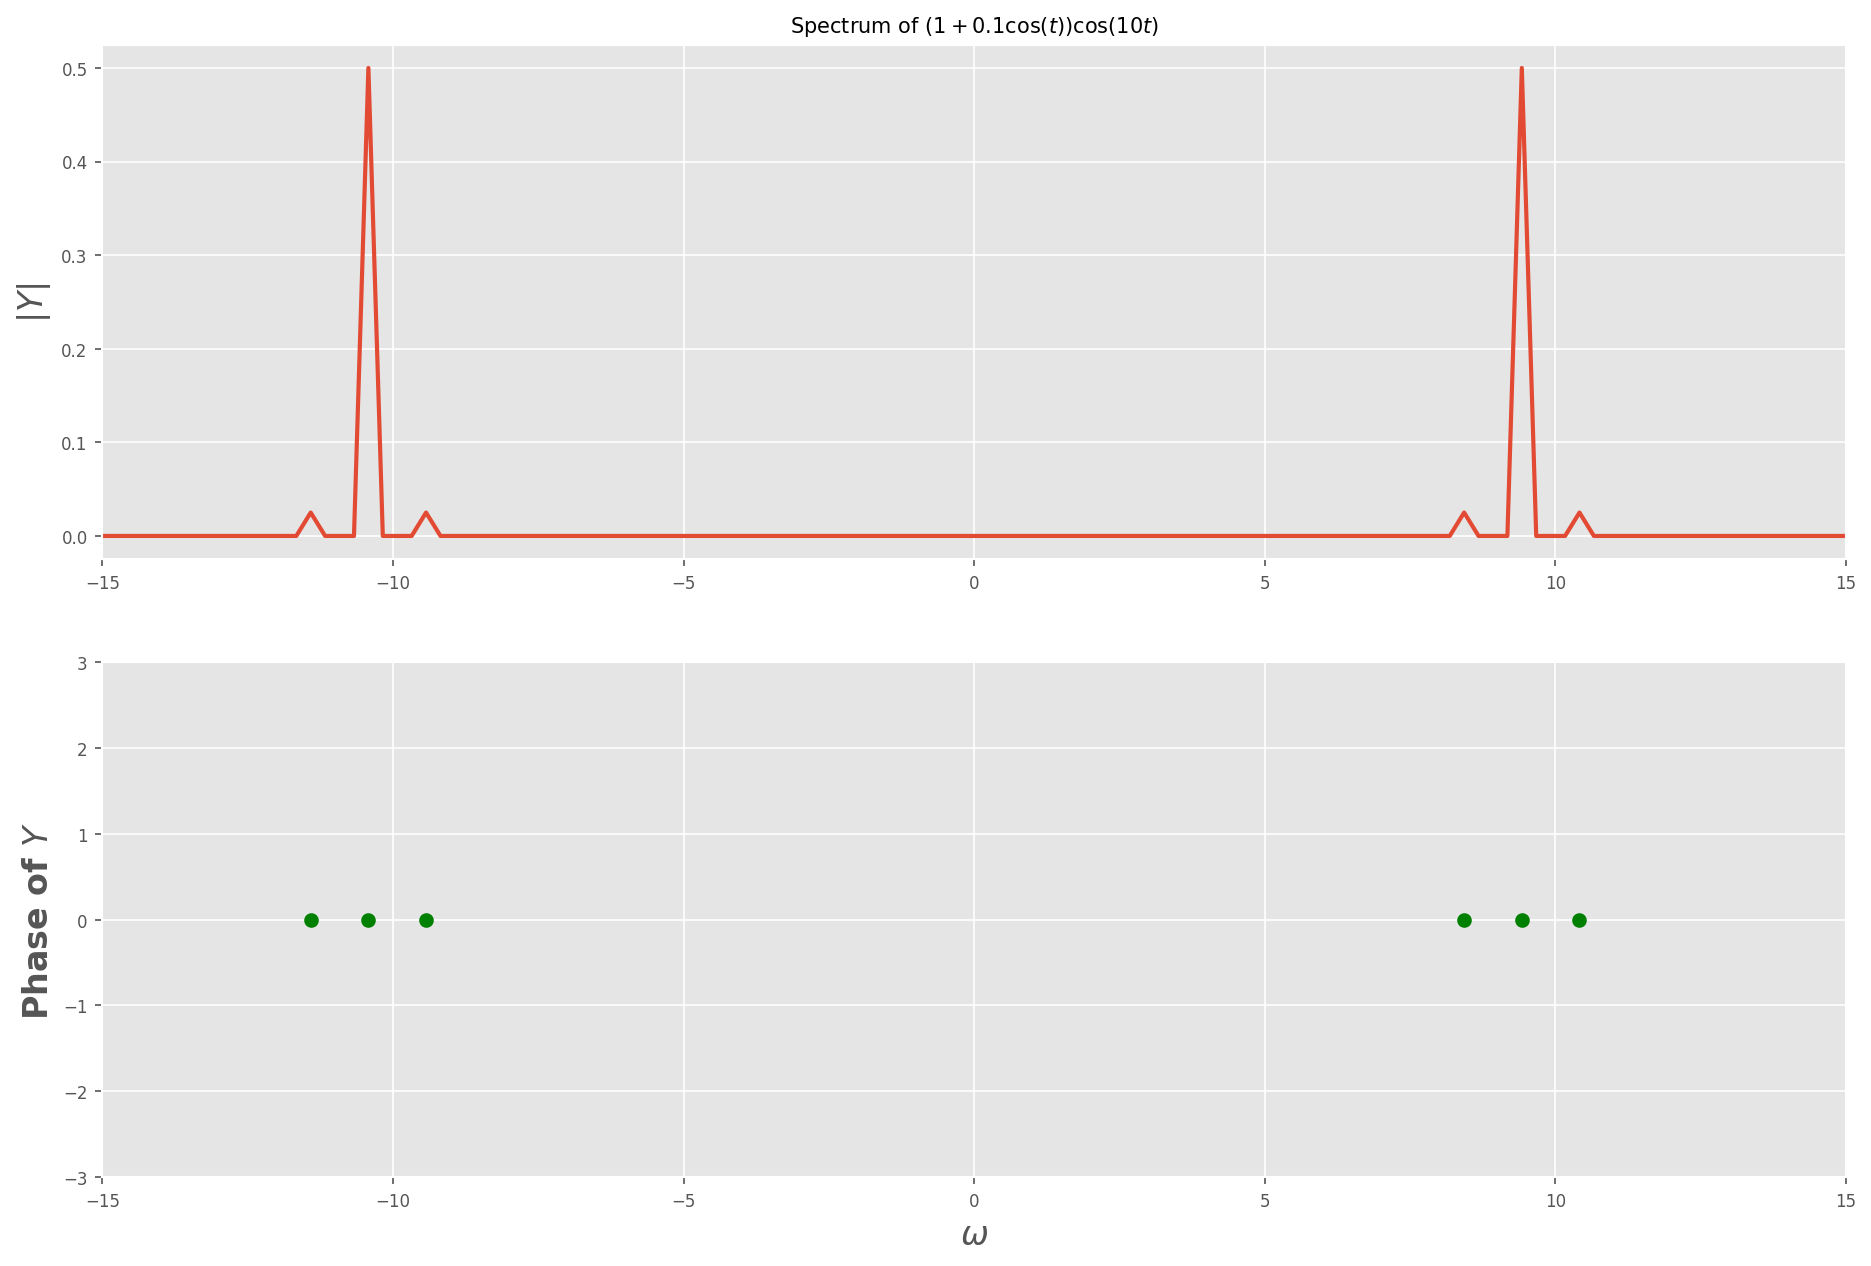

In [86]:
t=np.linspace(-4*np.pi,4*np.pi,513);t=t[:-1]
y=(1+0.1*np.cos(t))*np.cos(10*t)
Y=np.fft.fftshift(np.fft.fft(y))/512.0
w=np.linspace(-64,63,513);w=w[:-1]

# Figure 1
plt.figure()
plt.subplot(2,1,1)
plt.plot(w,abs(Y),lw=2)
plt.xlim([-15,15])
plt.ylabel(r"$|Y|$",size=16)
plt.title(r"Spectrum of $\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right)$")
plt.grid(True)
 
# Figure 2
plt.subplot(2,1,2)
#plt.plot(w,np.angle(Y),'ro',lw=2)
ii=np.where(np.abs(Y)>1e-3)
plt.plot(w[ii],np.angle(Y[ii]),'go',lw=2)
plt.xlim([-15,15])
plt.ylim([-3,3])
plt.ylabel(r"Phase of $Y$",size=16)
plt.xlabel(r"$\omega$",size=16)
plt.grid(True)
plt.show()

###  Writting a class to handle these

Since the assignment involves examining the DFT in various cases of functions, we might as well wrap all of these into a single class.

In [73]:
class DFT_assgn(object):
    def __init__(self):
        pass
    def plot_fft(self,y,title,samples=512,sup=1e-3,freq_max=64,x_lim=15,y_freq_lim=3,verbose=False,funky=False,return_val=False):
        # y is the array DFT is to be performed on
        Y=np.fft.fftshift(np.fft.fft(y))/(samples)
        if funky:
            Y=np.fft.fftshift(np.fft.fft(np.fft.ifftshift(y)))/(samples)
        w=np.linspace(-freq_max,freq_max-1,samples+1);w=w[:-1]

        # Figure 1
        plt.figure()
        plt.subplot(2,1,1)
        plt.plot(w,abs(Y),lw=2)
        plt.xlim([-x_lim,x_lim])
        plt.ylabel(r"$|Y|$",size=16)
        plt.title(title)
        plt.grid(True)

        # Figure 2
        plt.subplot(2,1,2)
        #plt.plot(w,np.angle(Y),'ro',lw=2)
        ii=np.where(np.abs(Y)>sup)
        if verbose:
            display(Y[ii])
        plt.plot(w[ii],np.angle(Y[ii]),'go',lw=2)
        plt.xlim([-x_lim,x_lim])
        plt.ylim([-y_freq_lim,y_freq_lim])
        plt.ylabel(r"Phase of $Y$",size=16)
        plt.xlabel(r"$\omega$",size=16)
        plt.grid(True)
        plt.show()
        
        if return_val:
            return (Y,w)

We test this on the previous example.

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


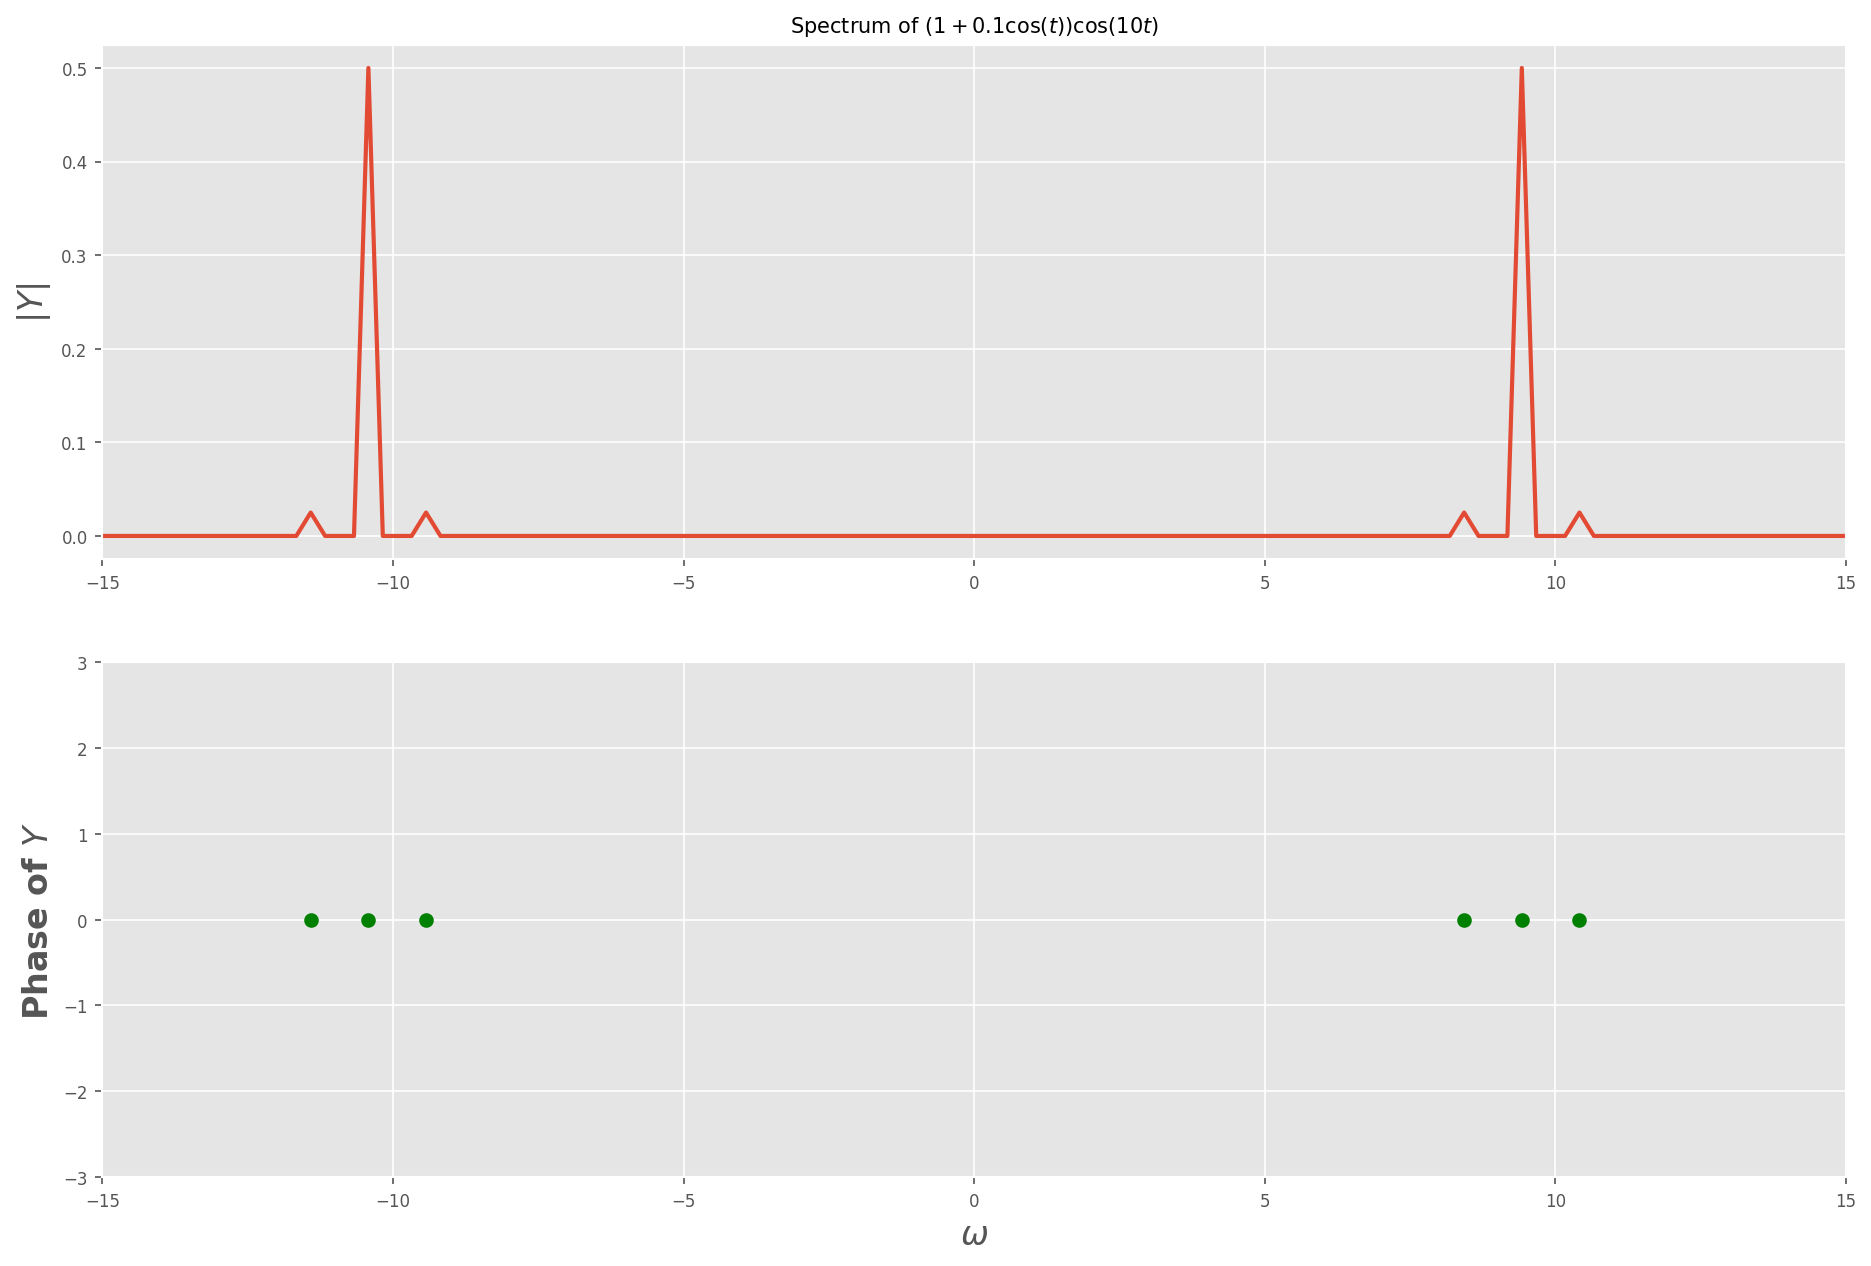

In [87]:
a=DFT_assgn()
t=np.linspace(-4*np.pi,4*np.pi,513);t=t[:-1]
y=(1+0.1*np.cos(t))*np.cos(10*t)
a.plot_fft(y,r"Spectrum of $\left(1+0.1\cos\left(t\right)\right)\cos\left(10t\right)$")

## Assignment Questions

For the sake of brevity, we shall use the defined class. If the default parameters donot give satisfactory or intended results, we supply suitable arguments. This has been mentioned as and when necessary.

### Sinusoids

We examine $sin^3t$ and $cos^3t$.

Note that, $$ sin^3t=\frac{3sin(t)-sin(3t)}{4} $$

and 

$$ cos^3t=\frac{3cos(t)+cos(3t)}{4} $$

We therefore expect 4 impulses in both cases, with one pair having thrice the magintude of the other. The phase plots in the two cases will however differ, with the sinusoids having alternative $\pm \pi/2$.

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


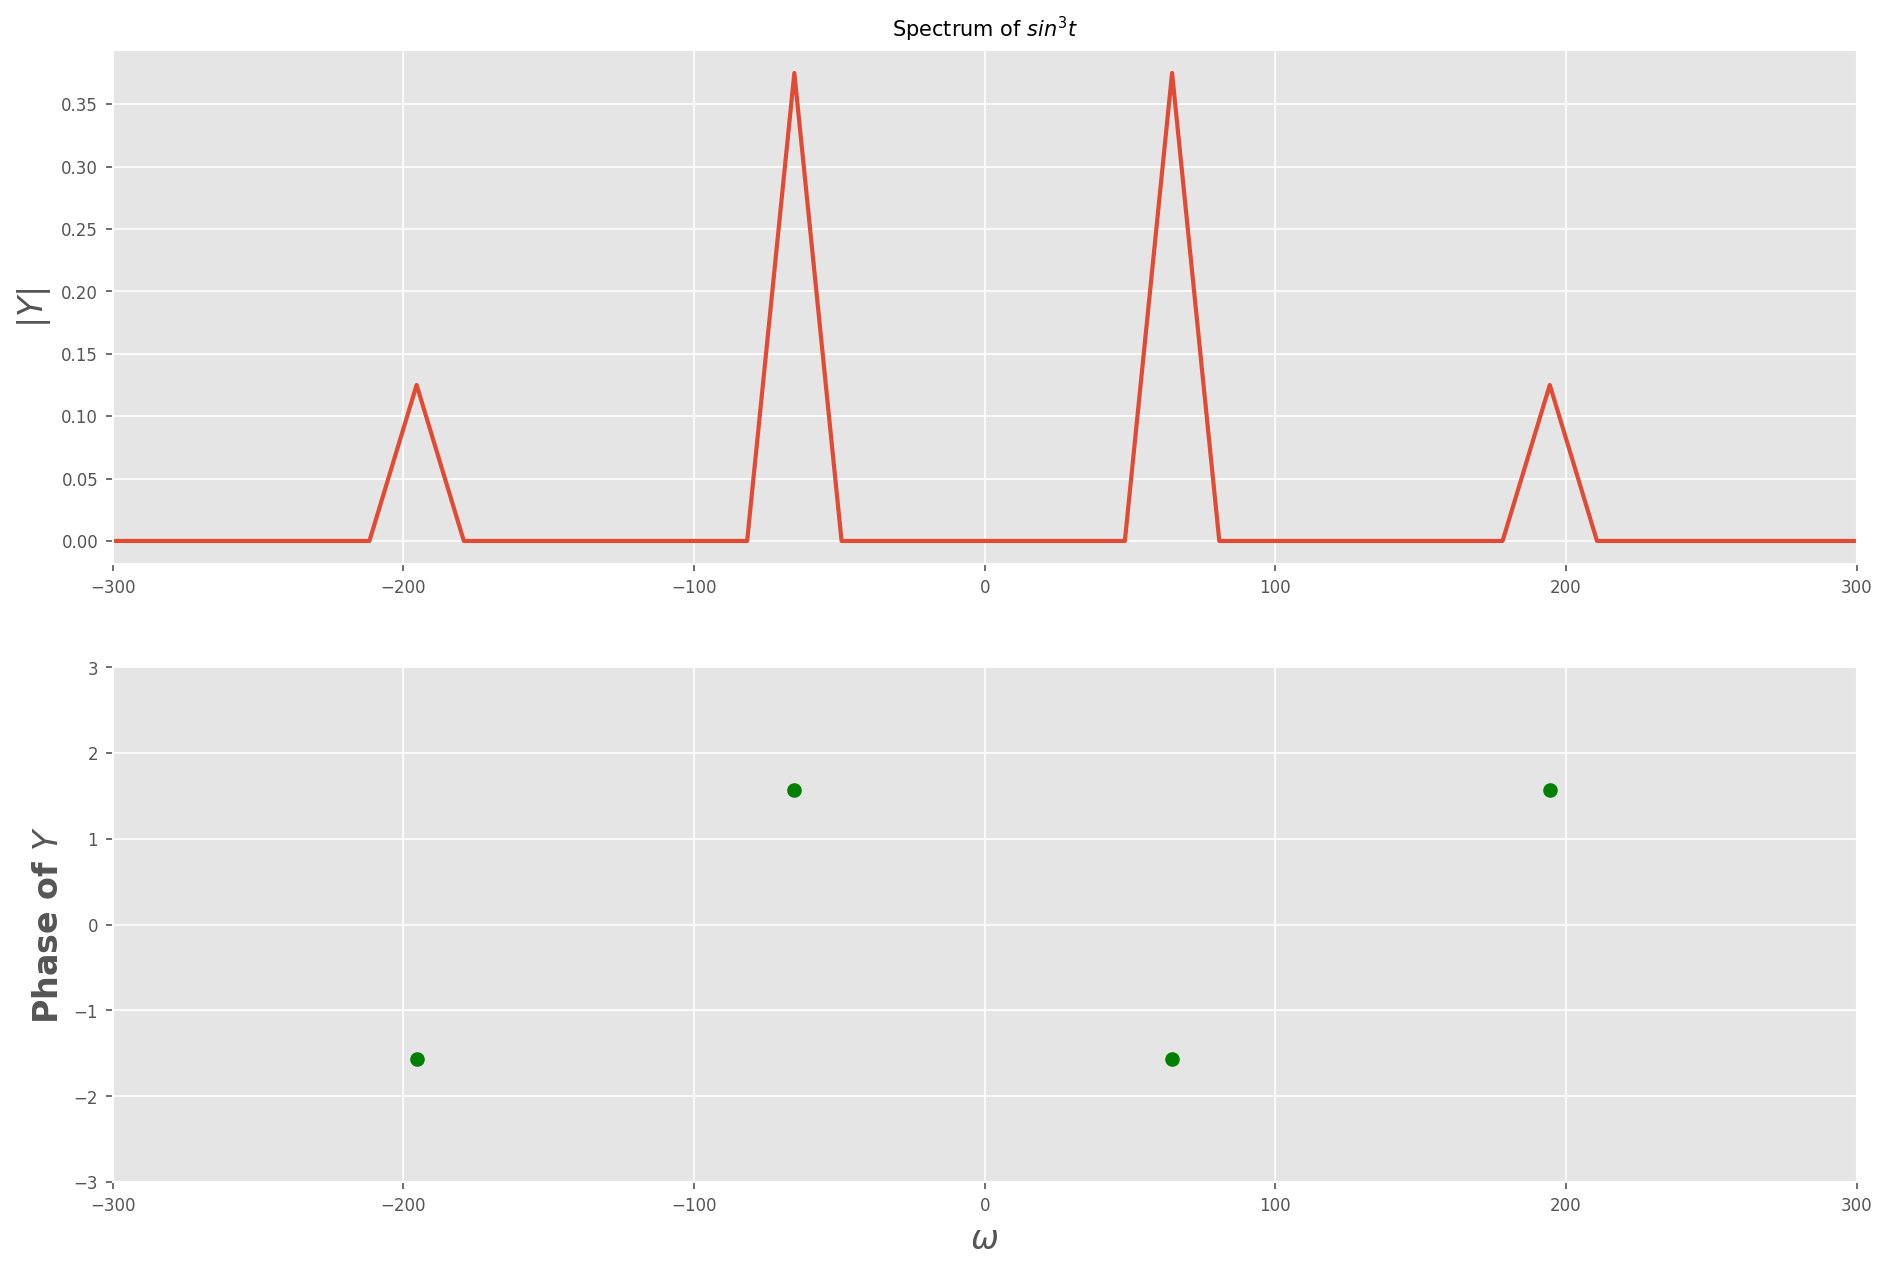

In [101]:
t=np.linspace(-4*np.pi,4*np.pi,127);t=t[:-1]
y=np.sin(t)**3
a.plot_fft(y,r"Spectrum of $sin^{3}t$",funky=True,samples=126,x_lim=300,freq_max=1024)

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


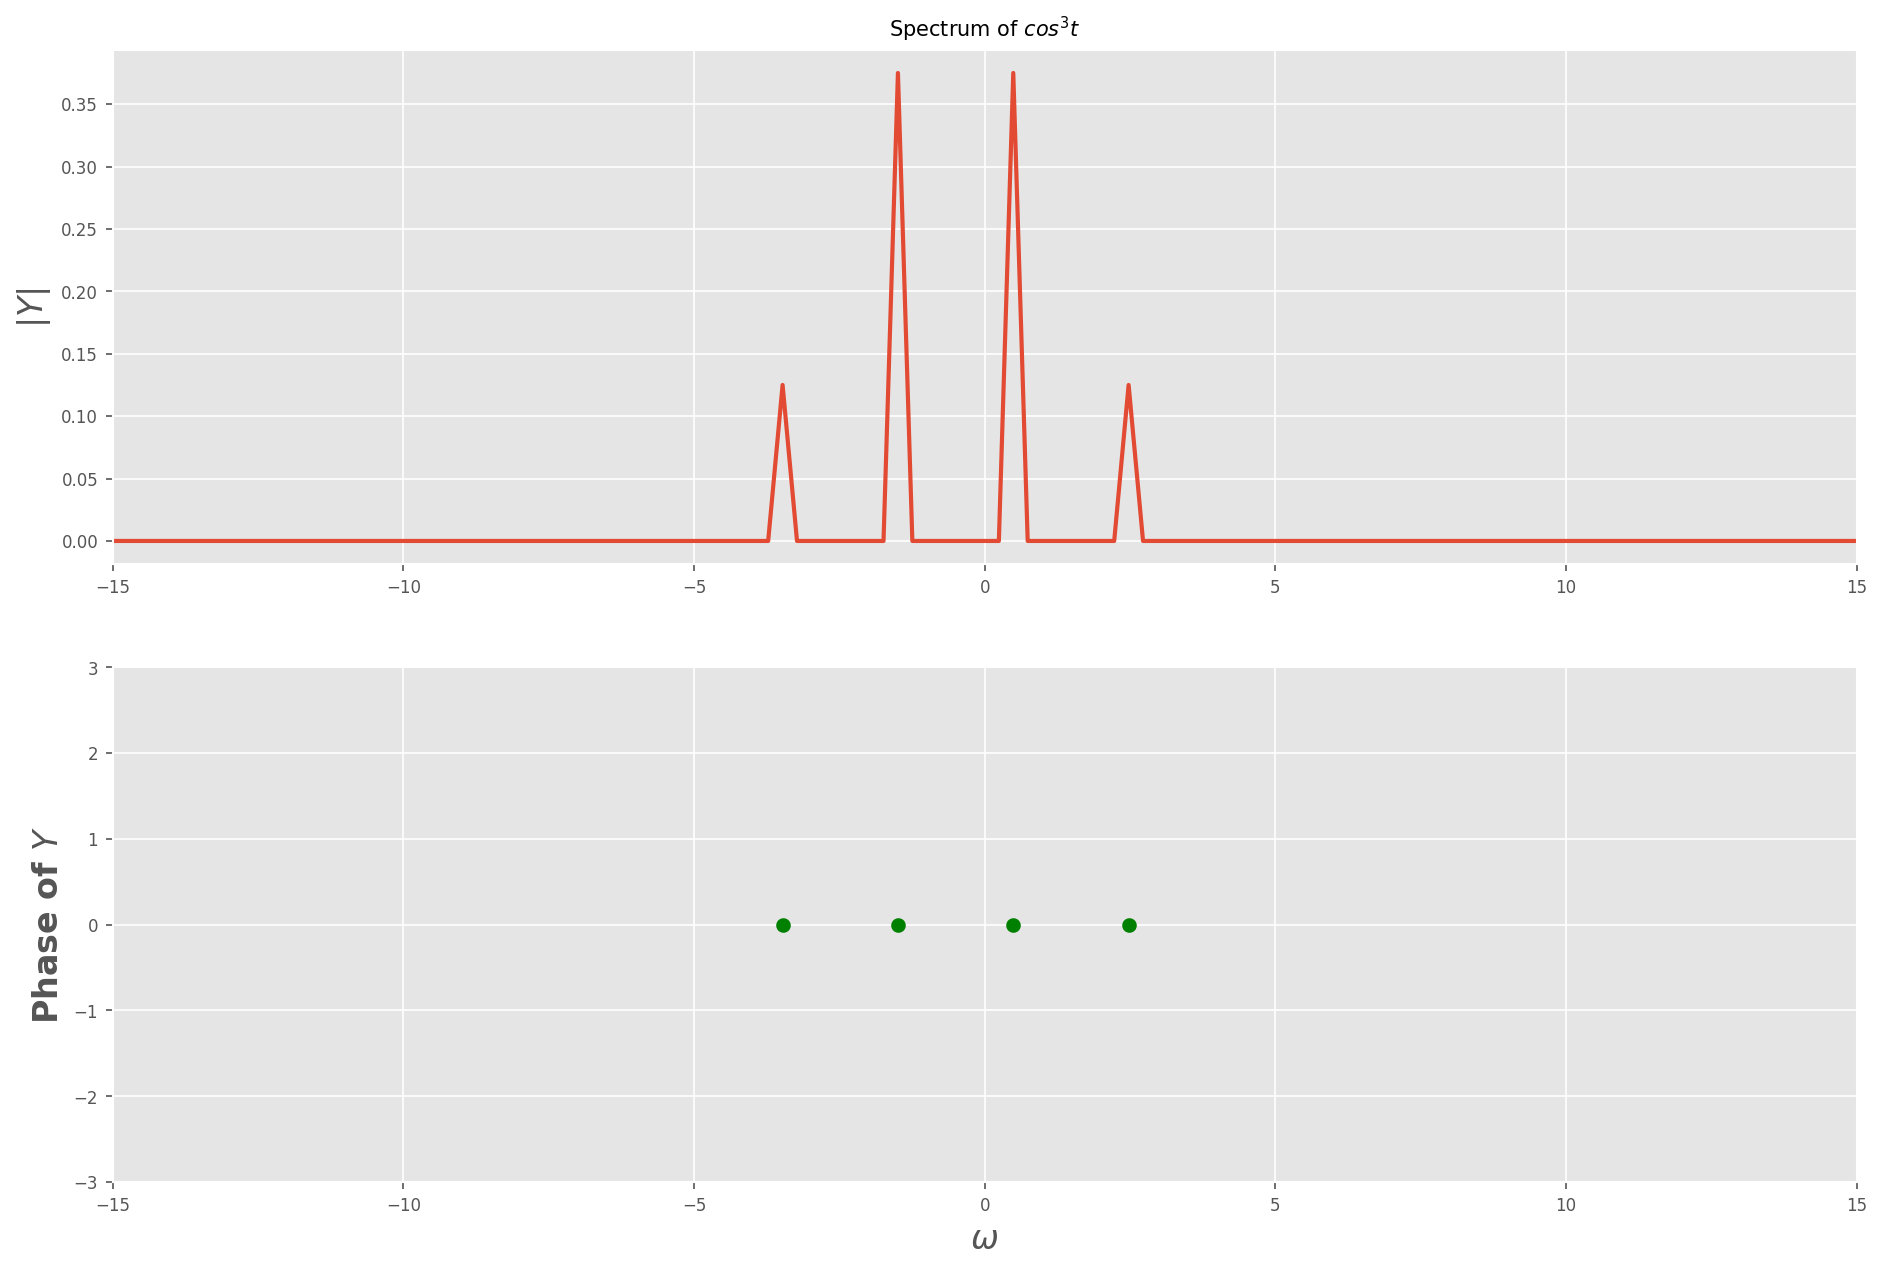

In [90]:
t=np.linspace(-4*np.pi,4*np.pi,513);t=t[:-1]
y=np.cos(t)**3
a.plot_fft(y,r"Spectrum of $cos^{3}t$")

### Frequency Modulation

Here, we examine the spectrum of $cos(20t+5cos(t))$.

In order to view the whole spectrum, the frequency x limits are altered to 35 from 15.

Note that,

$$ cos(20t+5cos(t))=\Re(\exp({20t + 5cos(t)}))$$
$$= \Re(\exp({j20t)})\sum_{k=-\infty}^{\infty}J_{k}({\beta})e^{jkt-\pi/2})$$
$$= \sum_{k=-\infty}^{\infty}J_{k}({\beta})\cos({kt+20t-\pi/2}) $$
$$= \sum_{k=-\infty}^{\infty}J_{k}({\beta})\sin({kt+20t}) $$

Here, 
$$ \beta=5 $$

So,
$$= \sum_{k=-\infty}^{\infty}J_{k}({5})\sin({kt+20t}) $$

Also, by the Laurent expansion defenition for Bessel Functions,
$$ \exp({\frac{\beta(z-1/z)}{2}})= \sum_{k=-\infty}^{\infty}J_{k}({\beta})z^{k}$$

#### References

1. https://www.dsprelated.com/freebooks/mdft/Sinusoidal_Frequency_Modulation_FM.html

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


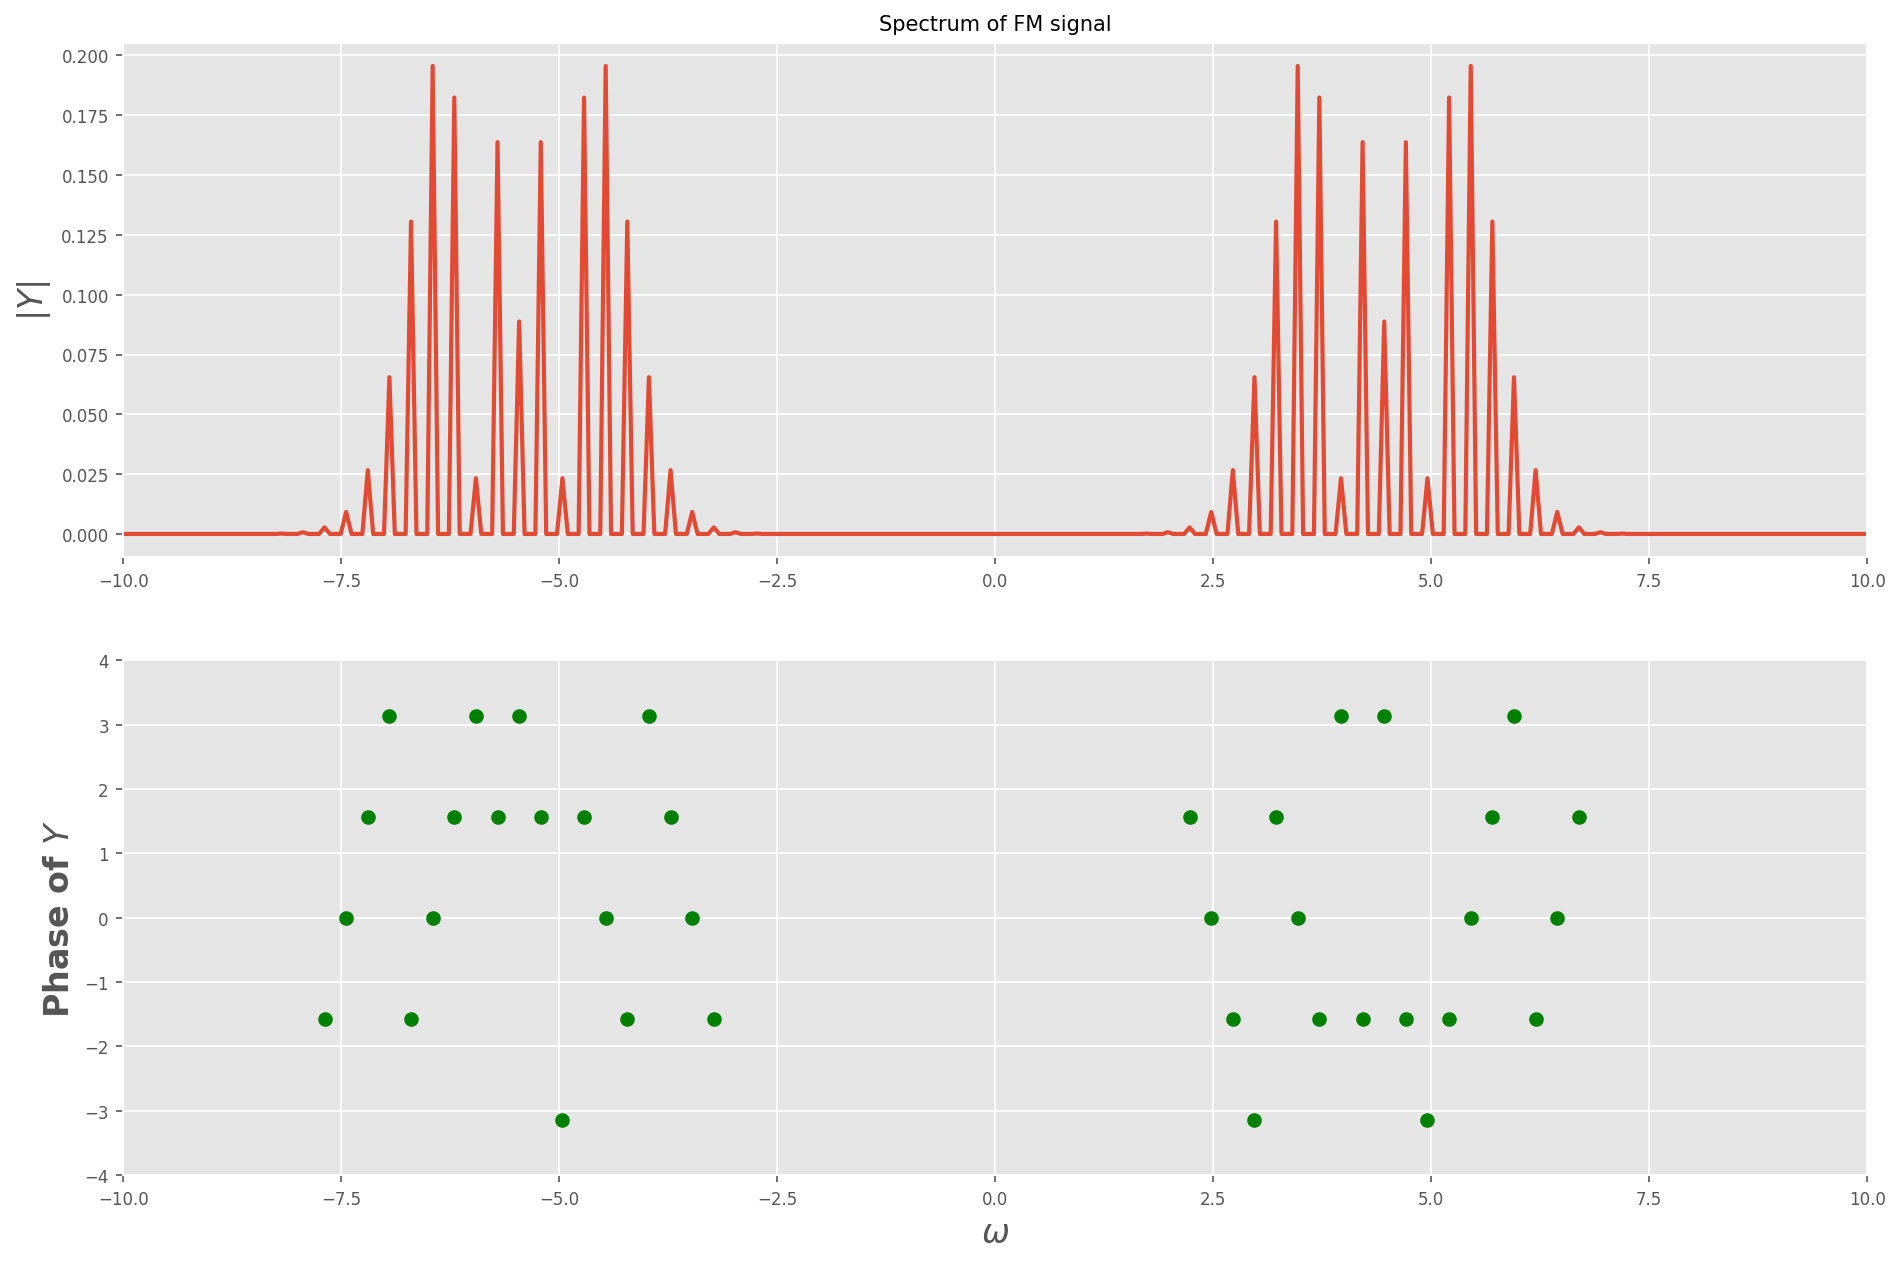

In [91]:
t=np.linspace(-4*np.pi,4*np.pi,2049);t=t[:-1]
y=np.cos(20*t+5*np.cos(t))
a.plot_fft(y,r"Spectrum of FM signal",samples=2048,x_lim=10,y_freq_lim=4)

We notice the similarity with the Bessel expansion by sampling the same. A continuous version of the same is shown below.

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


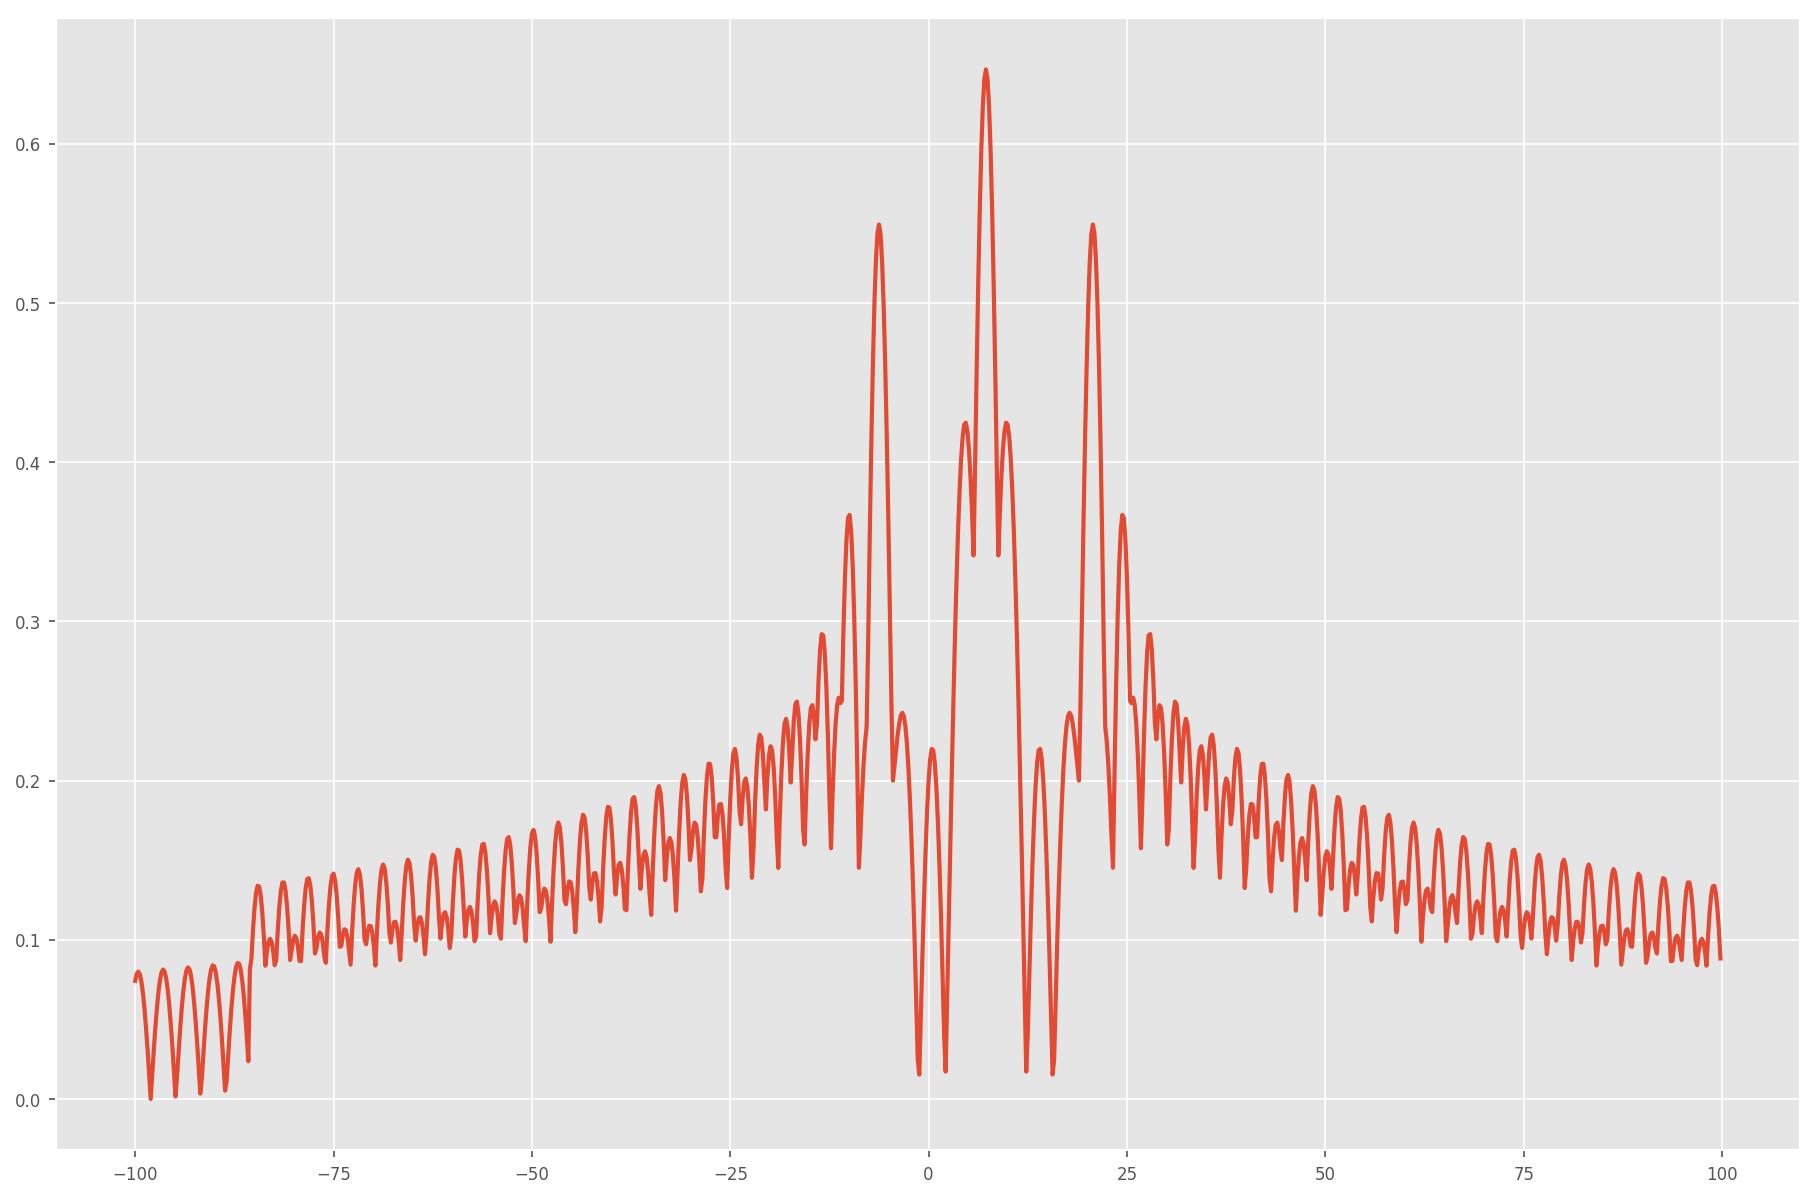

In [94]:
# Figure 1
plt.figure()
from scipy.special import jv as Bess
w=np.linspace(-100,100,1025)
w=w[:-1]
p=np.abs(Bess(5,w))
p[74:]+=p[:-74]
p[np.where(p<1e-3)]=0
plt.plot(w,p,lw=2)
plt.grid(True)
plt.show()

## Gaussian case

The Gaussian $e^{−t^2/2}$ is not “bandlimited” in frequency. We want to get its spectrum accurate to 6 digits, by different time ranges, and see what gets us a frequency domain that is so accurate.

A couple of subtilities involved here:

* The standard fftgauss = fftshift(fft(gauss)); fails here, since we get negative real values.
* The argument _funky_ alters this to fftgauss = fftshift(fft(ifftshift(gauss)))

This is an analogous problem in the time domain, where the FFT method warps around the wromg intial value of time, thereby introducing a phase error. Ifft_shift undoes this, centring our gaussian at 0.

#### References

1. https://in.mathworks.com/matlabcentral/answers/40257-gaussian-fft

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


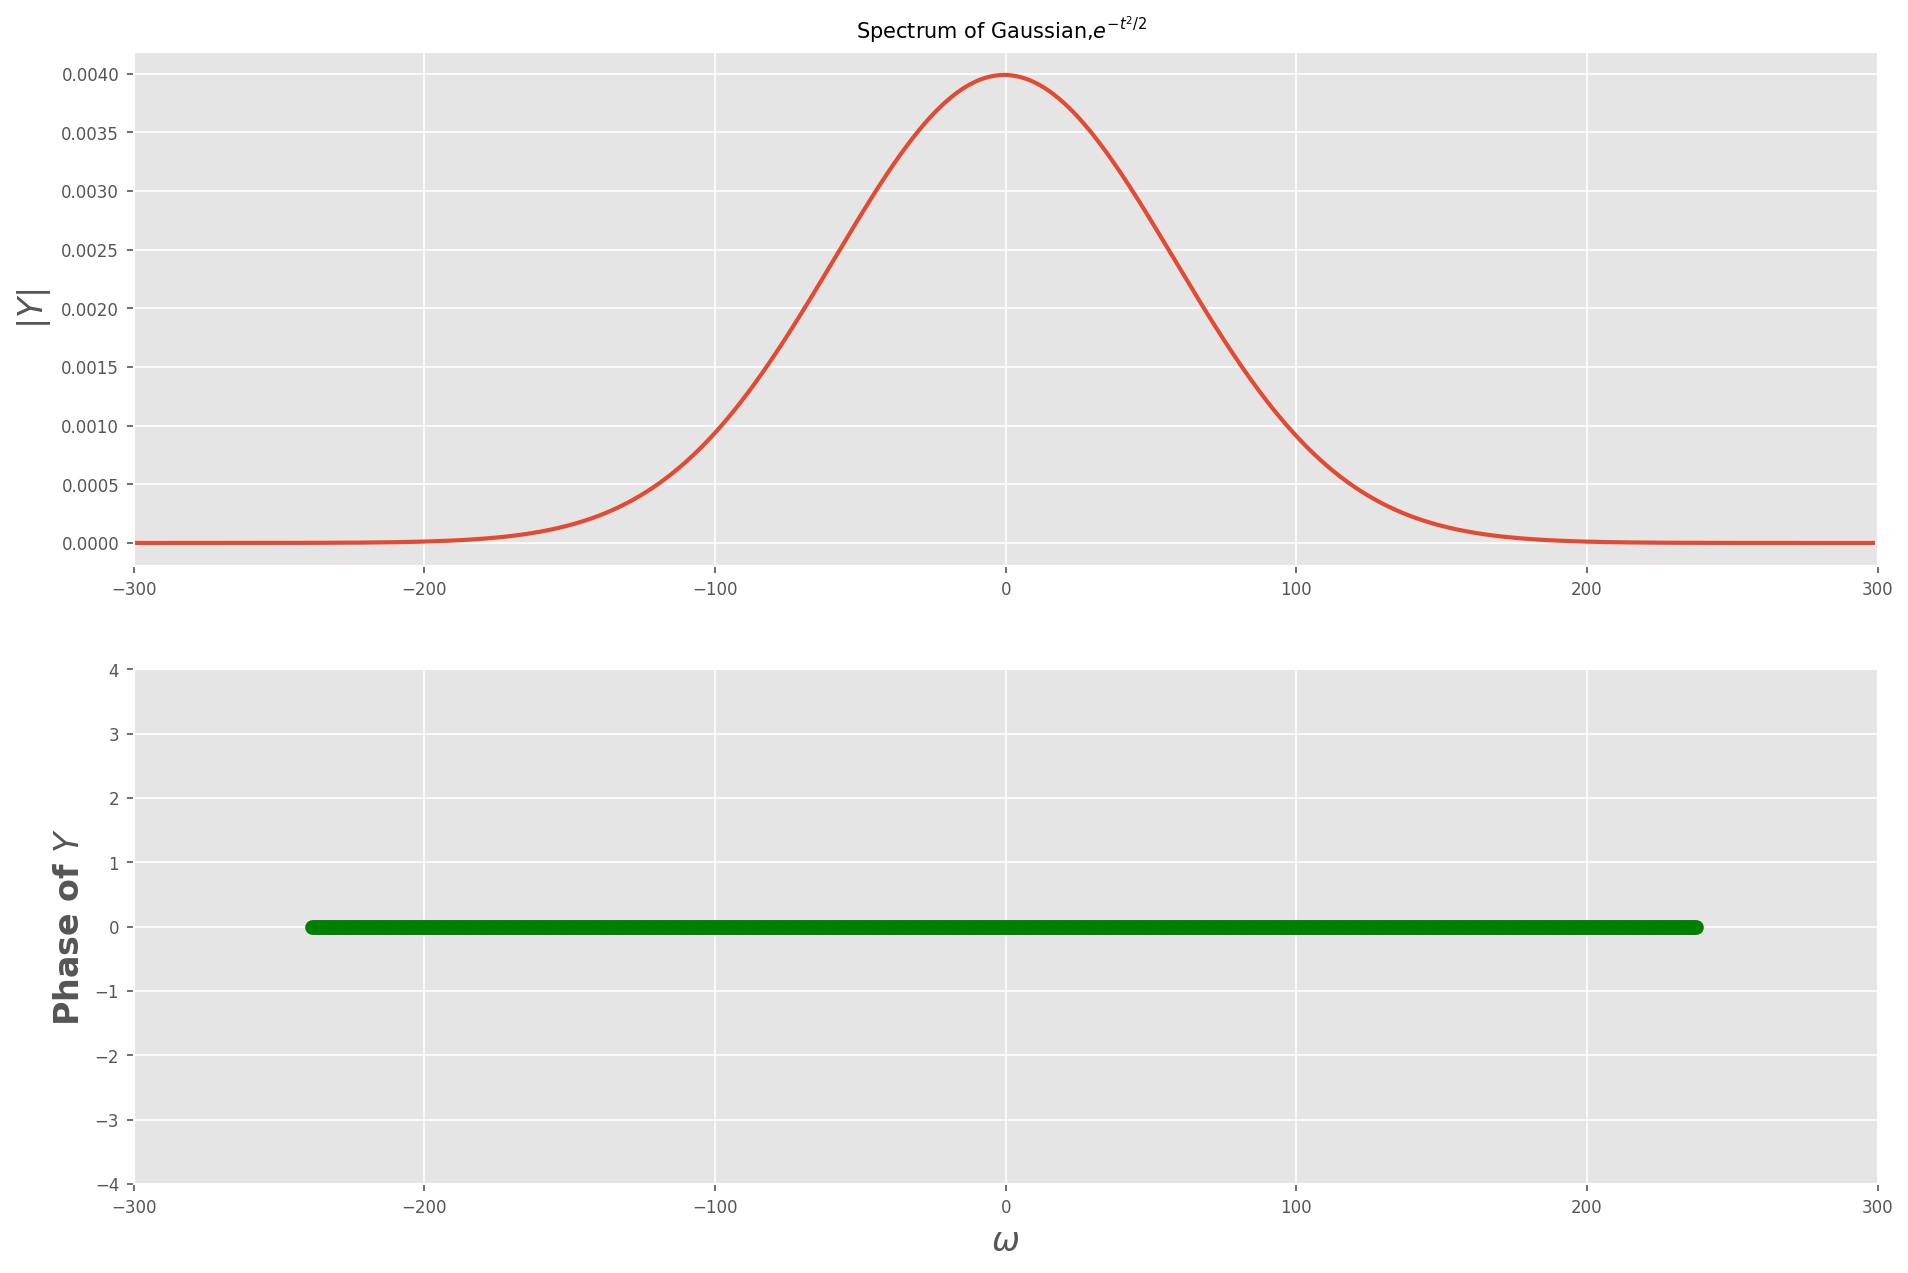

In [95]:
t=np.linspace(-100*np.pi,100*np.pi,1025);t=t[:-1]
y=np.exp(-t**2/2)
a.plot_fft(y,r"Spectrum of Gaussian,$e^{−t^2/2}$  ",samples=1024,sup=1e-6,freq_max=300,x_lim=300,y_freq_lim=4,verbose=False,funky=True)

### Converging to a given error tolerance

Here, we vary the windowing region and compare the output to a Gaussian:

$$ X(\omega)= \sqrt{2\pi }e^{-\omega^{2}/2} $$

We try symmetric values of $t$, ie.. $(-t_o,t_o)$.

/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys
/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/Users/Ankivarun/anaconda3/envs/tf_python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Case t_i = 	 10.0


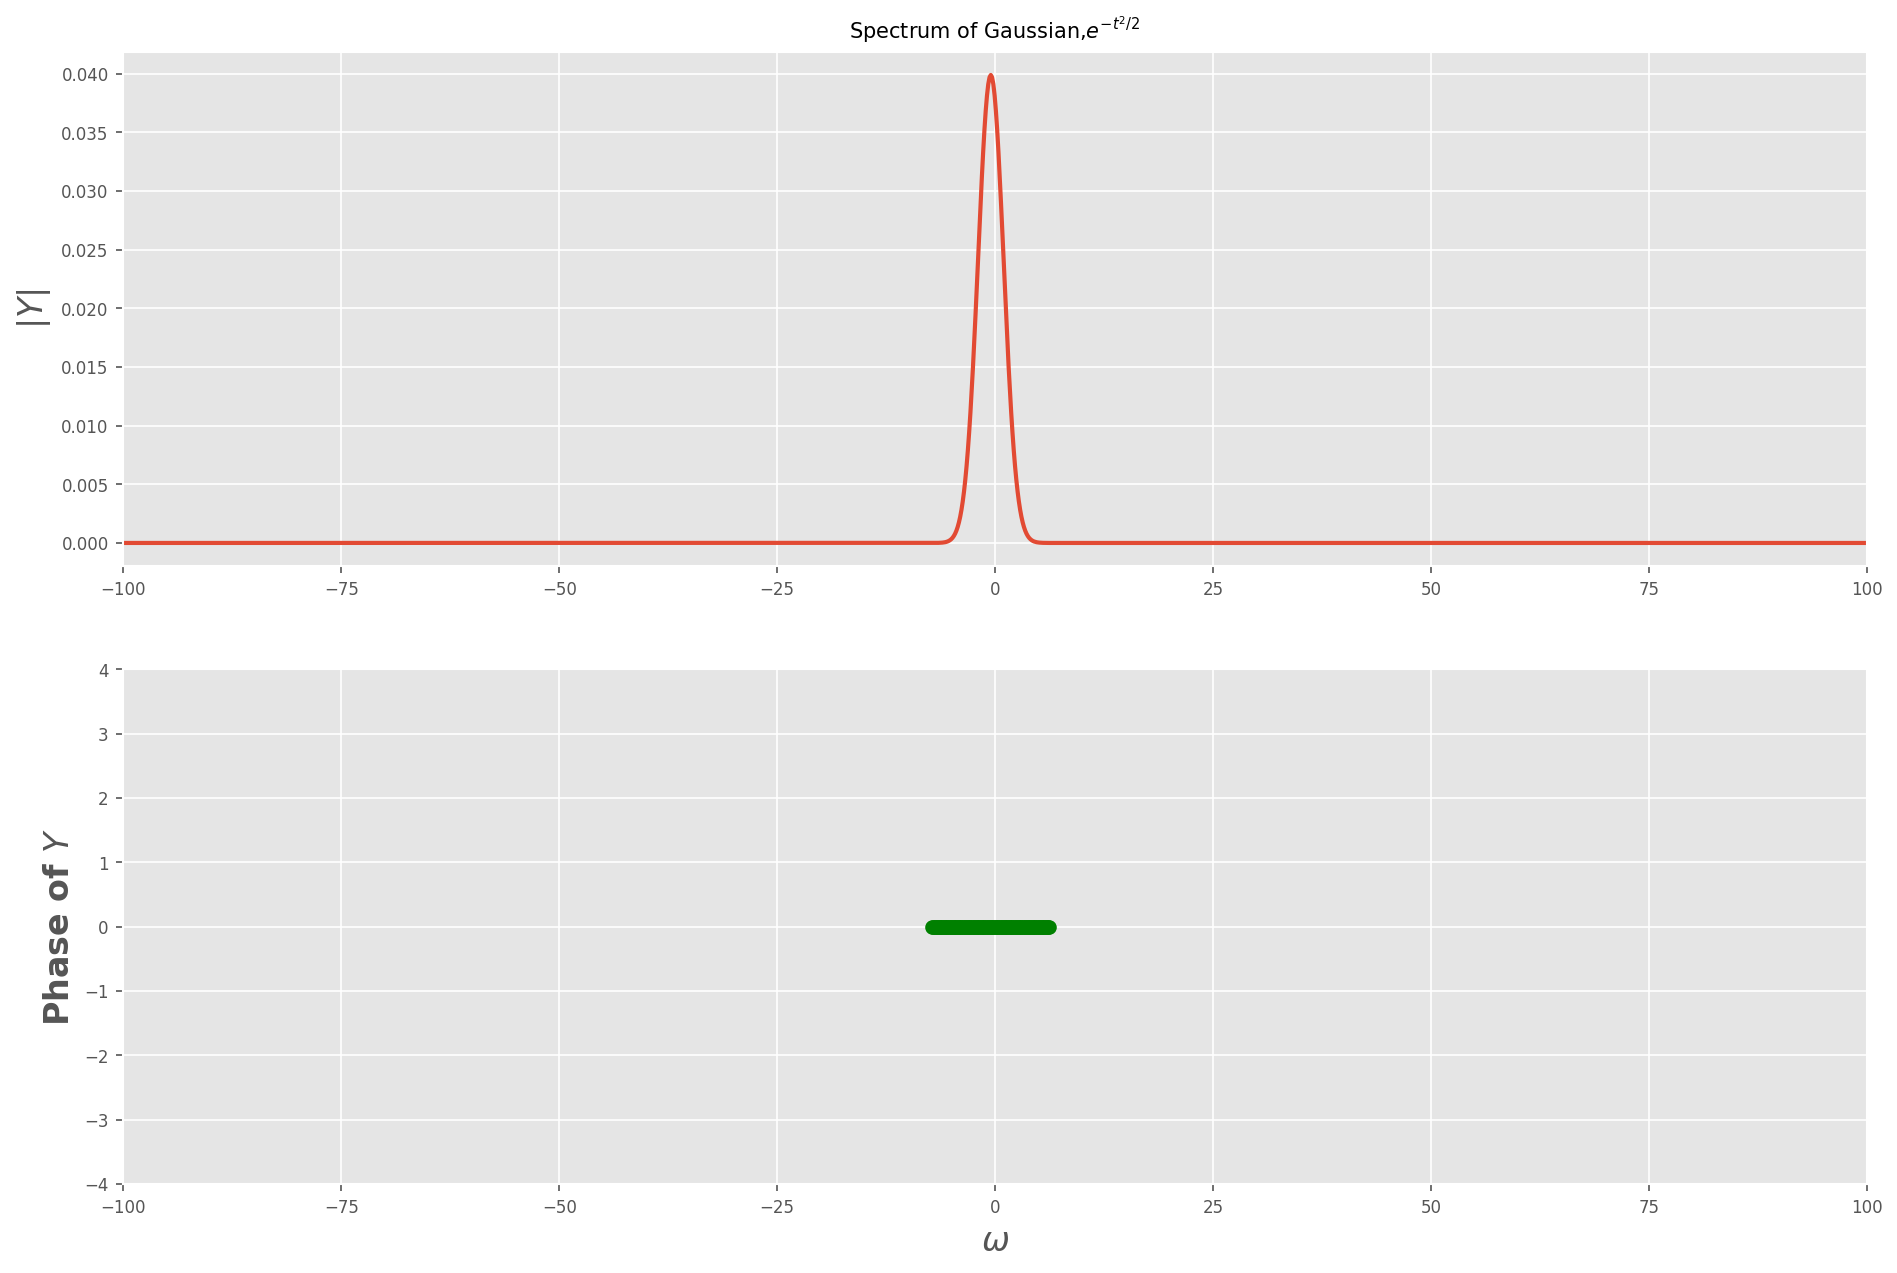

4096
4096
Case t_i = 	 40.0


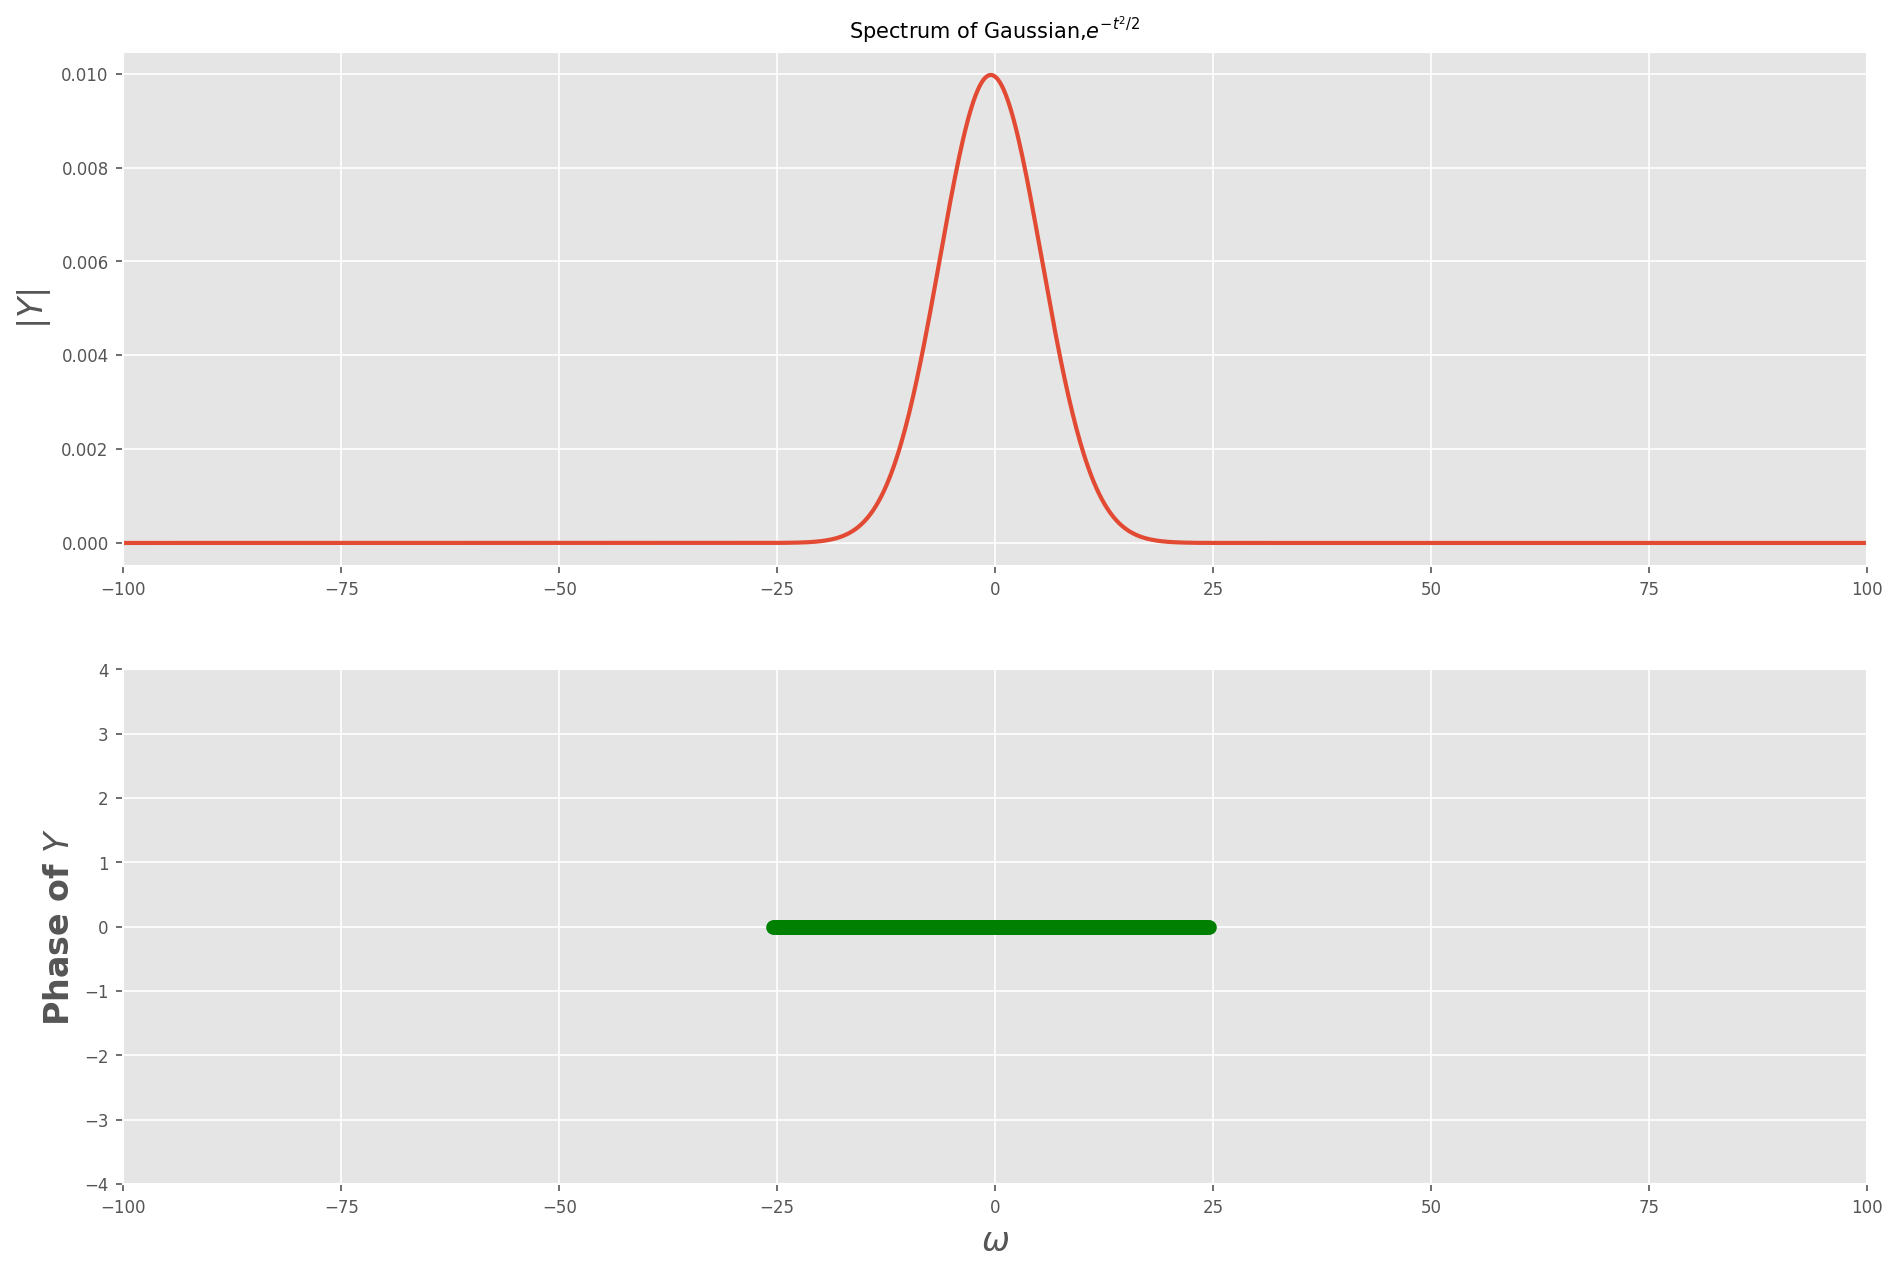

4096
4096
Max Error is 	 7.58677257986226e-05
Case t_i = 	 70.0


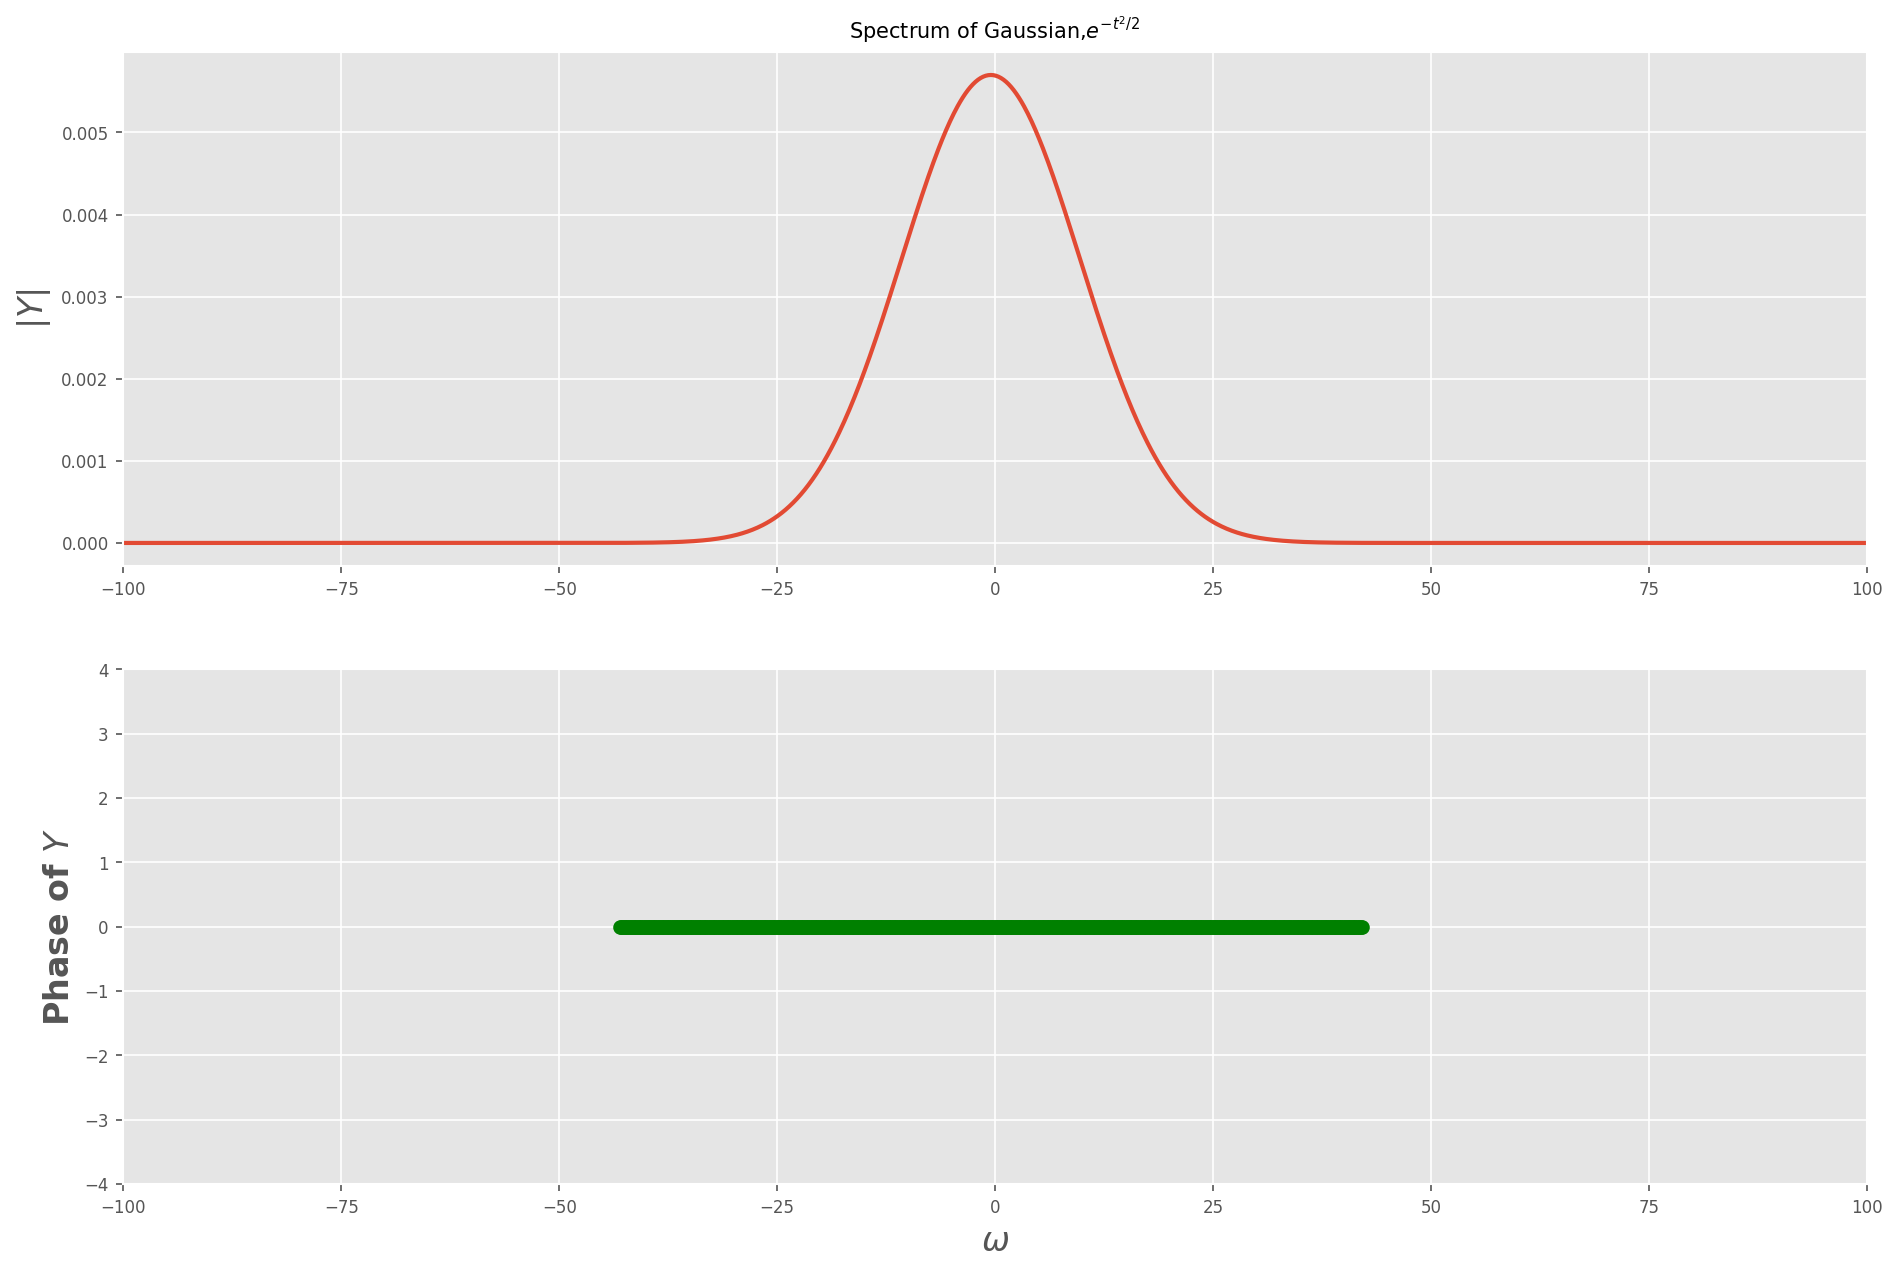

4096
4096
Max Error is 	 3.811429339574343e-05
Case t_i = 	 100.0


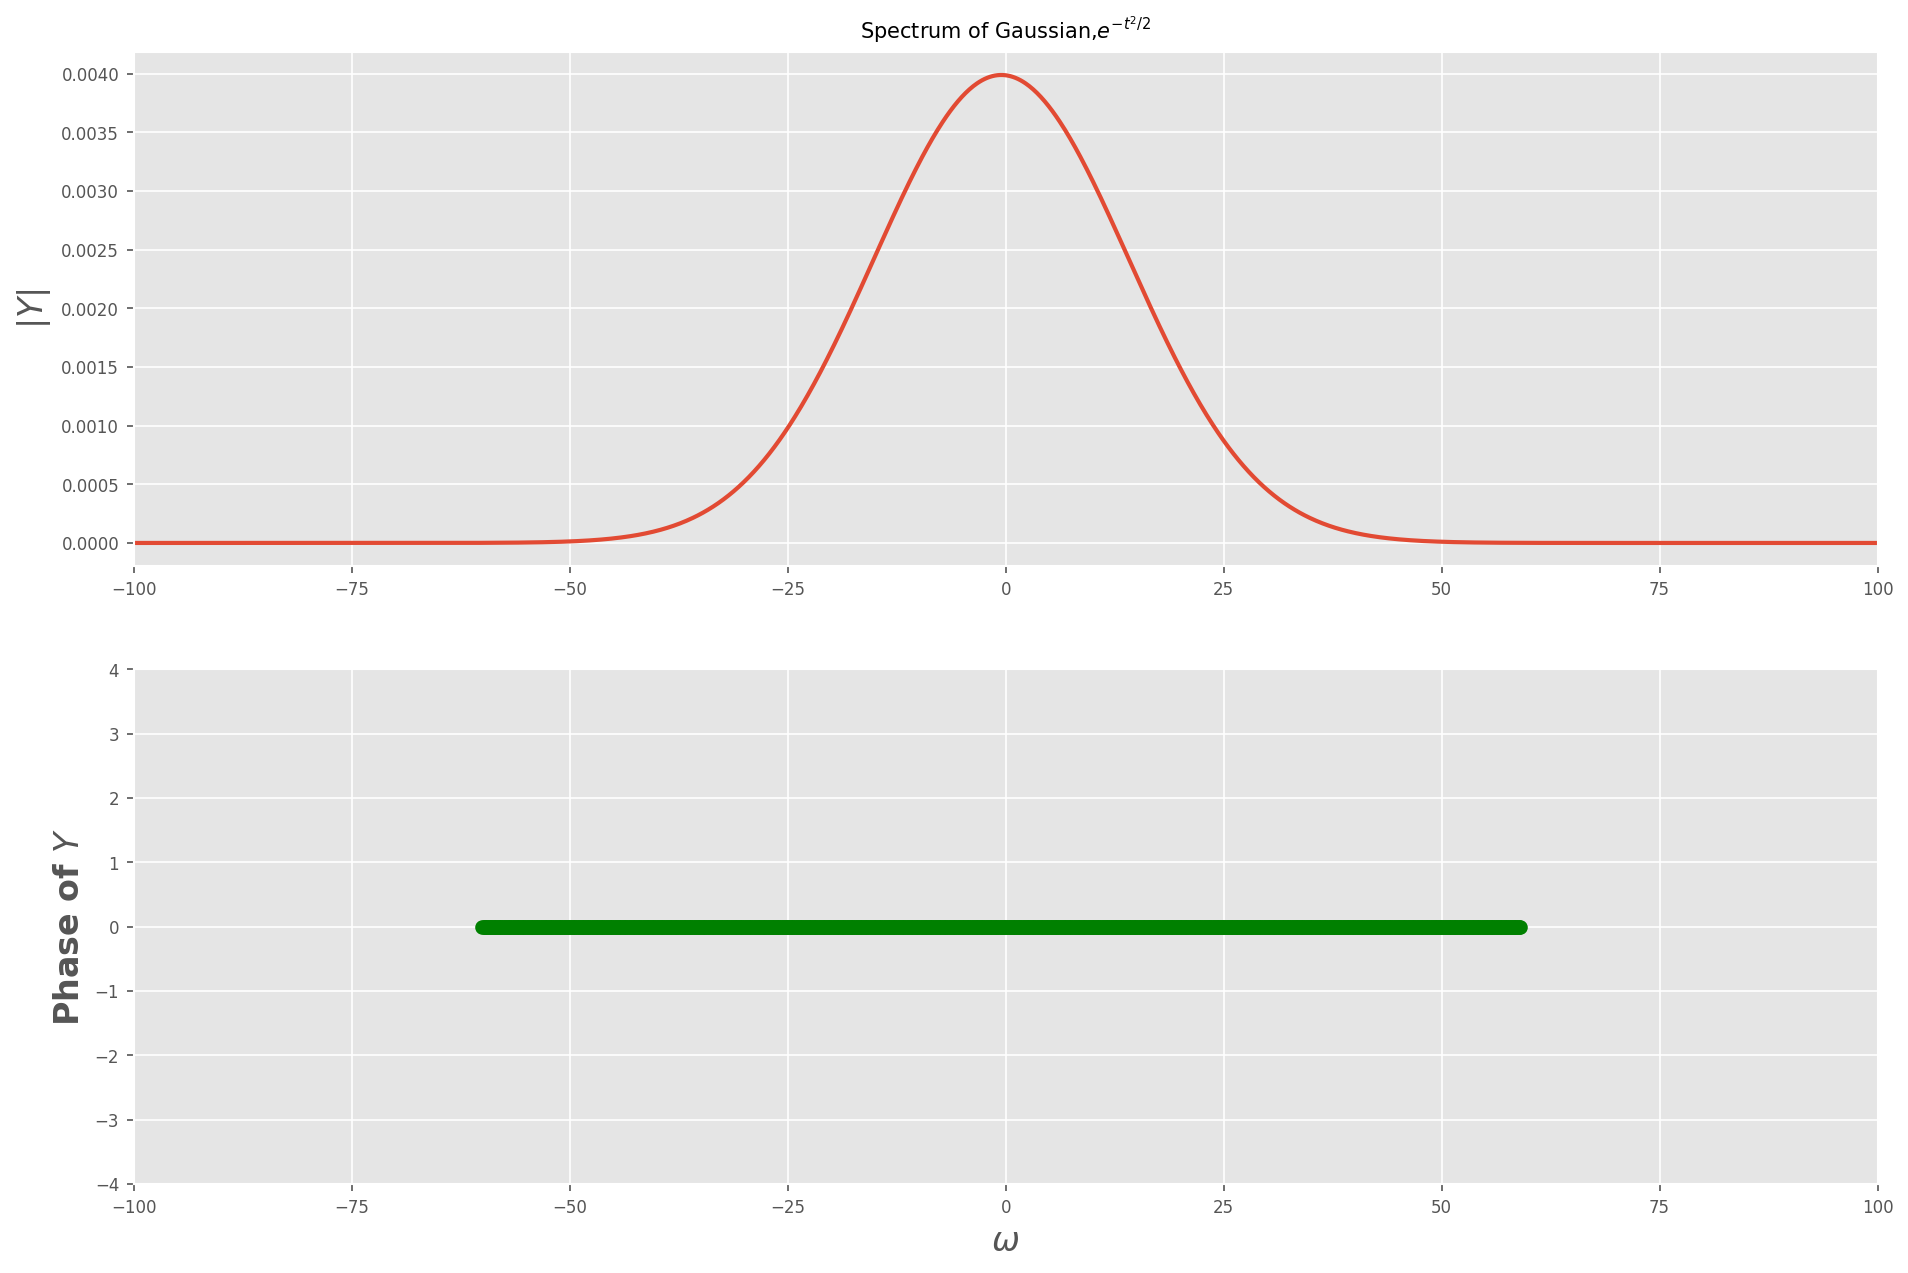

4096
4096
Max Error is 	 2.502413944628378e-05


In [96]:
### Symmetric time span limits
t_s=np.linspace(10,100,num=4)
samples_s=np.ones(len(t_s))*4097
Y_w_list=[]

for i in range(len(t_s)):
    t=np.linspace(-t_s[i]*np.pi,t_s[i]*np.pi,samples_s[i]);t=t[:-1]
    y=np.exp(-t**2/2)
    print ("Case t_i = \t",t_s[i])
    Y,w=a.plot_fft(y,r"Spectrum of Gaussian,$e^{−t^2/2}$",samples=samples_s[i]-1,sup=1e-6,freq_max=300,x_lim=100,y_freq_lim=4,\
               verbose=False,funky=True,return_val=True)
    Y_w_list.append((Y,w))
    gauss=1/np.sqrt(2*np.pi)*np.exp(-4*w**2/t_s[i]**2)
    print(len(Y))
    print(len(w))
    if i>=1:
        print("Max Error is \t",np.max(np.abs(Y*t_s[i]-Y_w_list[-2][0]*t_s[i-1])/samples_s[i])) #Y_w_list[-2][0]*t_s[i-1]
    #plt.plot(w,gauss)

Hence, a time-span of $(-100,100)*2\pi$ gives us the required cross error rate.

# Results and Discussion

We have examined the DFT's of sinusoids, amplitude modulated signals, frequency modulated modulated signals, exponentiated sinusoids, and gaussians. In each case, we utilise sampling of the DTFT to explain the spectrum or have used the discretisation of the continuous array the signal is derived from. We noted the need for using `ifftshift` and `fftshift` to undistort even signals, and in cases where phase has been distorted.

## A Note on the relationship between DTFT and DFT

While it may inherently seem straightforward that a DFT is the sampled verison of a DTFT, there are a few catches.

We will need to truncate the DTFT to a finite range of N samples, without arbitrary loss of power (no constant functions or deltas).

Next, we need to determine if the range of $x[n]$ should be $[0...N-1]$ or $[-N/2...N/2-1]$. That will determine if ifftshift needs to be used. 

Note that the continuous $X (\omega)$ is now discretized or sampled. Locations of samples are either $\omega ∈ 2\pi [0...N − 1]$ or $\omega ∈ 2\pi [ N / 2...N / 2 − 1]$ depending of whether fftshift has been used.


This also causes ambiguity in the inverse, due to the dual range for $\omega$. Observing that DFT and DFS are closely related, the inverse results in a periodic construct for $\tilde{x}[n]$, from which we recover $x[n]$

 This creates an ambiguity as to whether $x[n]$ is defined for $n$ in $[0...N-1]$ or $[-N/2...N/2-1]$, hence creating a need for `iiftshift`.